In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import plotly.express as px

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/DANO_O2/Covid/dataset_fd_Sp_no-Mos.csv')

In [ ]:
data.head(35)

week  region                                            oced  \
0   2020-04-06  Адыгея                    Производство и строительство   
1   2020-04-06  Адыгея                    Производство и строительство   
2   2020-04-06  Адыгея            Финансы, страхование и юриспруденция   
3   2020-04-06  Адыгея                    Производство и строительство   
4   2020-04-06  Адыгея  Административная и управленческая деятельность   
5   2020-04-06  Адыгея                                          Услуги   
6   2020-04-06  Адыгея                              Торговля и продажи   
7   2020-04-06  Адыгея                                     Образование   
8   2020-04-06  Адыгея                                           Связь   
9   2020-04-06  Адыгея                                          Услуги   
10  2020-04-06  Адыгея            Финансы, страхование и юриспруденция   
11  2020-04-06  Адыгея                                          Услуги   
12  2020-04-06  Адыгея  Административная и управленческая деятельность   
13  2020-04-06  Адыгея  Административная и управленческая деятельность   
14  2020-04-06  Адыгея                    Производство и строительство   
15  2020-04-06  Адыгея                    Производство и строительство   
16  2020-04-06  Адыгея               Работы, не требующие квалификации   
17  2020-04-06  Адыгея                    Производство и строительство   
18  2020-04-06  Адыгея        Здравоохранение и социальное обеспечение   
19  2020-04-06  Адыгея                    Производство и строительство   
20  2020-04-06  Адыгея        Здравоохранение и социальное обеспечение   
21  2020-04-06  Адыгея                           Транспорт и логистика   
22  2020-04-06  Адыгея                                          Услуги   
23  2020-04-06  Адыгея                                          Услуги   
24  2020-04-06  Адыгея  Административная и управленческая деятельность   
25  2020-04-06  Адыгея  Административная и управленческая деятельность   
26  2020-04-06  Адыгея                    Производство и строительство   
27  2020-04-06  Адыгея               Работы, не требующие квалификации   
28  2020-04-06  Адыгея                              Торговля и продажи   
29  2020-04-06  Адыгея                    Производство и строительство   
30  2020-04-06   Алтай                                           Связь   
31  2020-04-06   Алтай                                          Услуги   
32  2020-04-06   Алтай                    Производство и строительство   
33  2020-04-06   Алтай                              Торговля и продажи   
34  2020-04-06   Алтай                                          Услуги   

    unemployed  cv_gender  cv_birthday_2000  cv_birthday_1990  \
0           19         18                 0                 3   
1            2          1                 0                 0   
2           13          6                 0                 2   
3            9          2                 1                 2   
4           17          8                 0                 3   
5            7          6                 0                 2   
6           74         15                 0                16   
7           16          2                 0                 3   
8            8          5                 0                 3   
9            7          2                 0                 2   
10          19          3                 0                 7   
11          17          4                 0                 6   
12          16          3                 0                 5   
13          25          4                 0                 7   
14           9          6                 0                 1   
15           6          6                 0                 0   
16          87          0                 0                 0   
17           3          3                 0                 1   
18          18          5                 0                 2   
19           1          1                 0  

-------------------------------------------------------

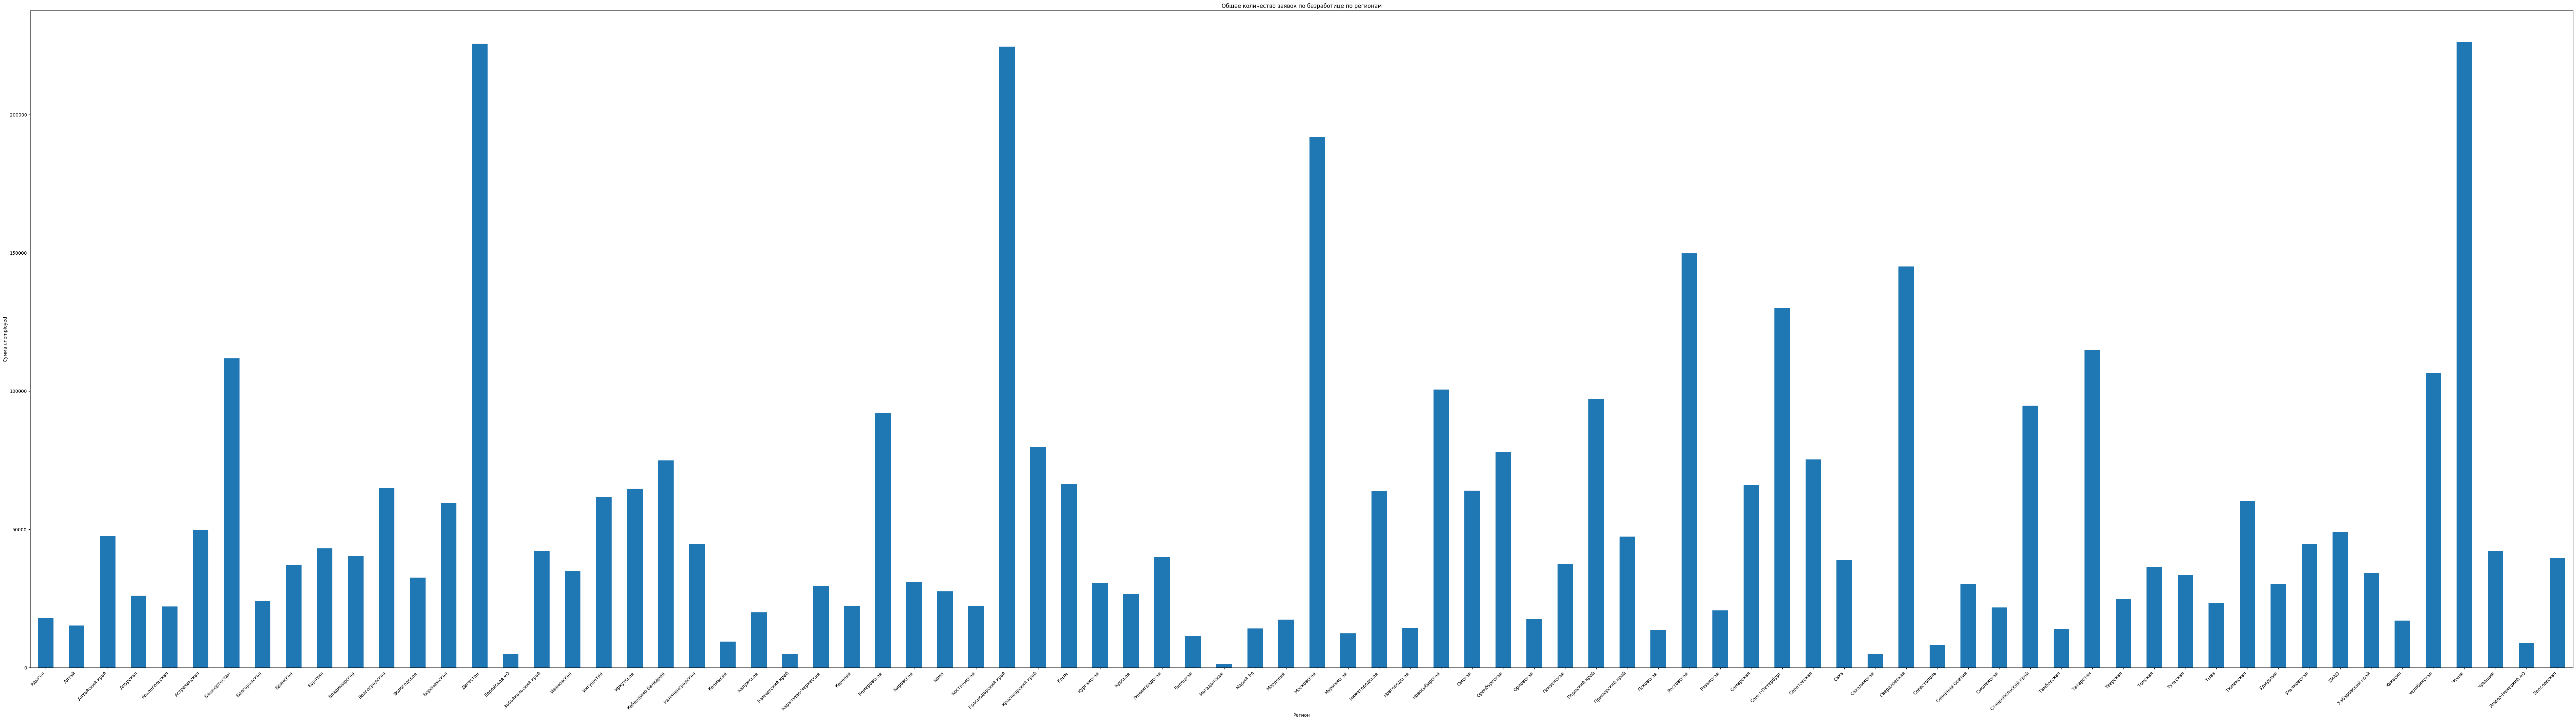

In [ ]:
average_applications_by_region = data.groupby('region')['unemployed'].sum()

plt.figure(figsize=(100, 26))
average_applications_by_region.plot(kind='bar')
plt.title('Общее количество заявок по безработице по регионам')
plt.xlabel('Регион')
plt.ylabel('Сумма unemployed')
plt.xticks(rotation=45, ha='right')
plt.show()


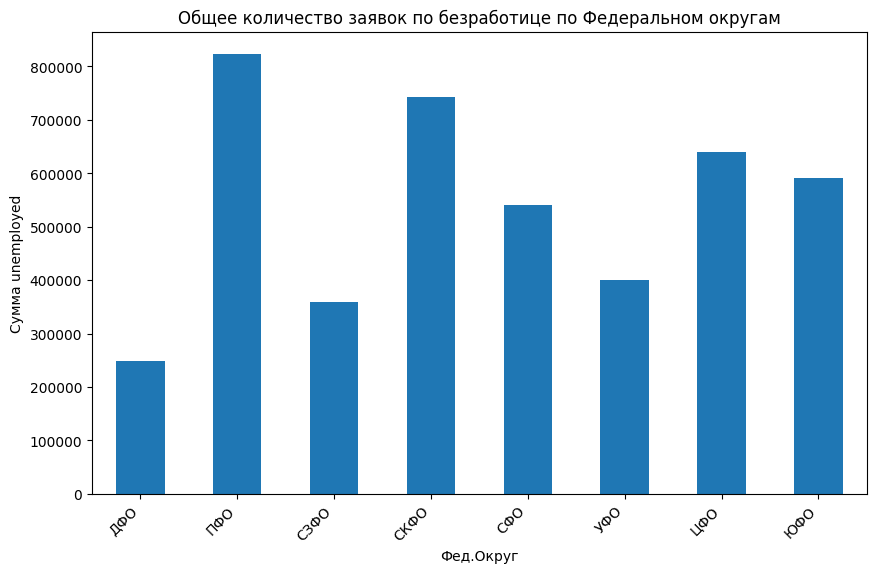

In [ ]:
average_applications_by_region = data.groupby('federal_district')['unemployed'].sum()

plt.figure(figsize=(10, 6))
average_applications_by_region.plot(kind='bar')
plt.title('Общее количество заявок по безработице по Федеральном округам')
plt.xlabel('Фед.Округ')
plt.ylabel('Сумма unemployed')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 3000x1500 with 0 Axes>

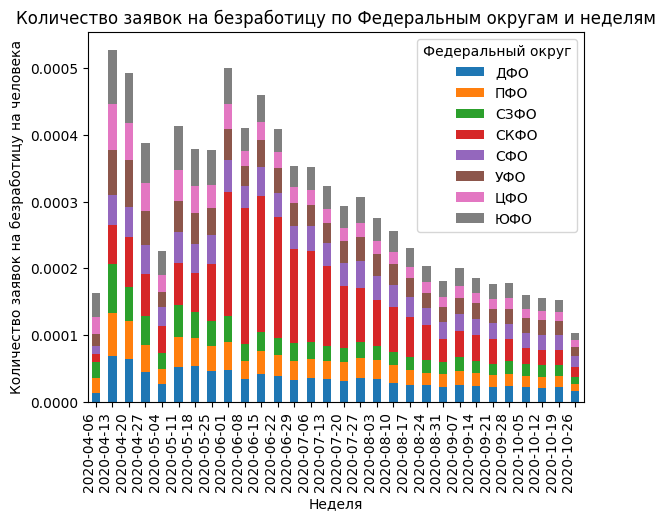

In [ ]:
grouped_data = data.groupby(['week', 'federal_district'])[['unemployed', 'population']].sum()
grouped_data['average_unemployed'] = grouped_data['unemployed'] / grouped_data['population']
plt.figure(figsize=(30, 15))
grouped_data['average_unemployed'].unstack().plot(kind='bar', stacked=True)
plt.title('Количество заявок на безработицу по Федеральным округам и неделям')
plt.xlabel('Неделя')
plt.ylabel('Количество заявок на безработицу на человека')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Федеральный округ')
plt.show()

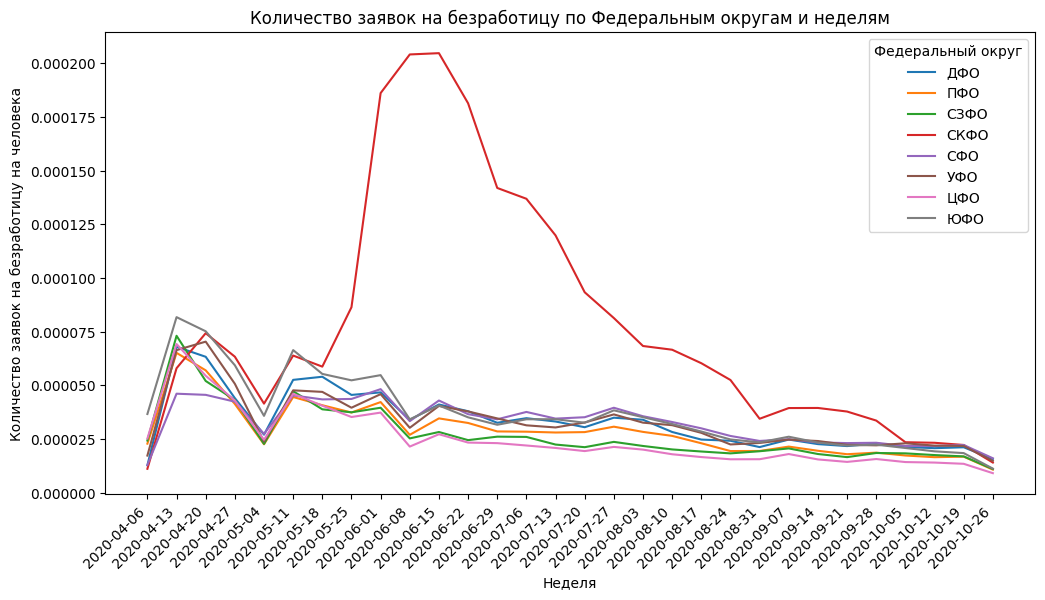

In [ ]:
grouped_data = data.groupby(['week', 'federal_district'])[['unemployed', 'population']].sum()

grouped_data['average_unemployed'] = grouped_data['unemployed'] / grouped_data['population']
plt.figure(figsize=(12, 6))
for federal_district in grouped_data.index.get_level_values('federal_district').unique():
    district_data = grouped_data.loc[grouped_data.index.get_level_values('federal_district') == federal_district]
    plt.plot(district_data.index.get_level_values('week'), district_data['average_unemployed'], label=federal_district)

plt.title('Количество заявок на безработицу по Федеральным округам и неделям')
plt.xlabel('Неделя')
plt.ylabel('Количество заявок на безработицу на человека')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Федеральный округ')
plt.show()

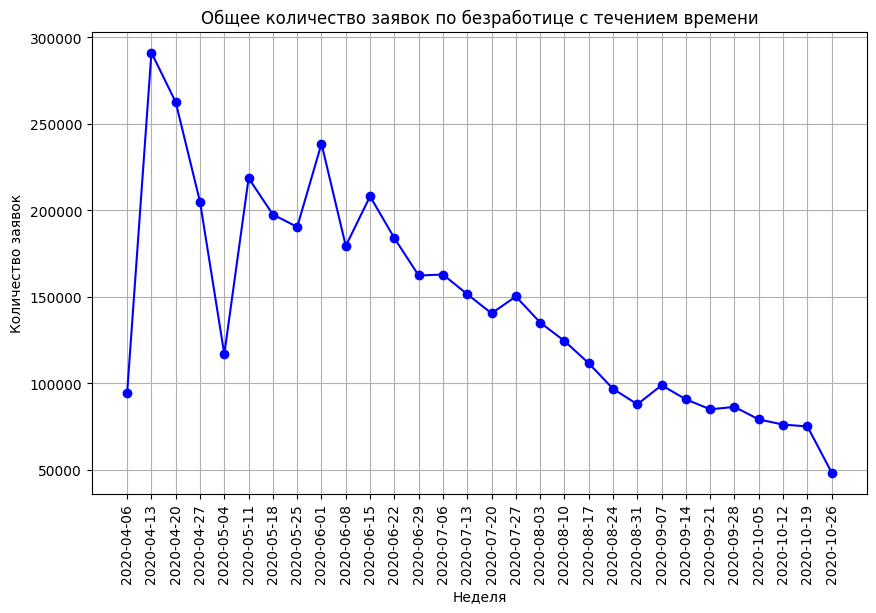

In [ ]:
total_claims = data.groupby('week')['unemployed'].sum()

plt.figure(figsize=(10, 6))
plt.plot(total_claims.index, total_claims.values, marker='o', linestyle='-', color='b')
plt.title('Общее количество заявок по безработице с течением времени')
plt.xlabel('Неделя')
plt.ylabel('Количество заявок')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

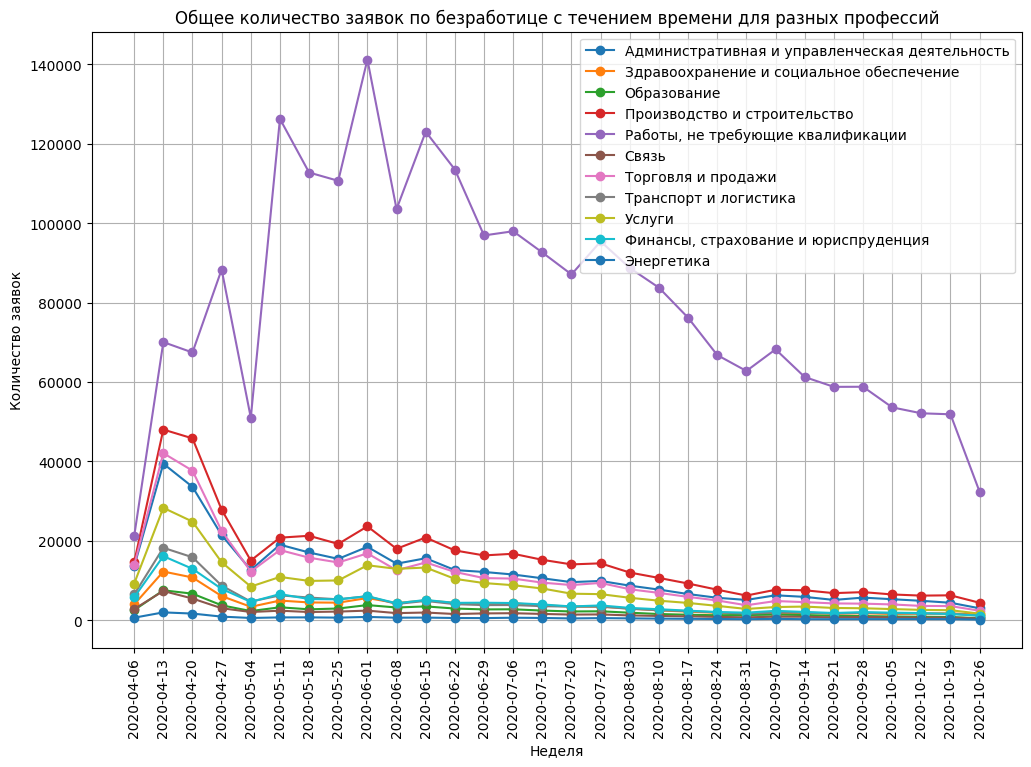

In [ ]:
grouped_data = data.groupby(['week', 'oced'])['unemployed'].sum().reset_index()

unique_oced = grouped_data['oced'].unique()

plt.figure(figsize=(12, 8))
for profession in unique_oced:
    profession_data = grouped_data[grouped_data['oced'] == profession]
    plt.plot(profession_data['week'], profession_data['unemployed'], label=profession, marker='o')

plt.title('Общее количество заявок по безработице с течением времени для разных профессий')
plt.xlabel('Неделя')
plt.ylabel('Количество заявок')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

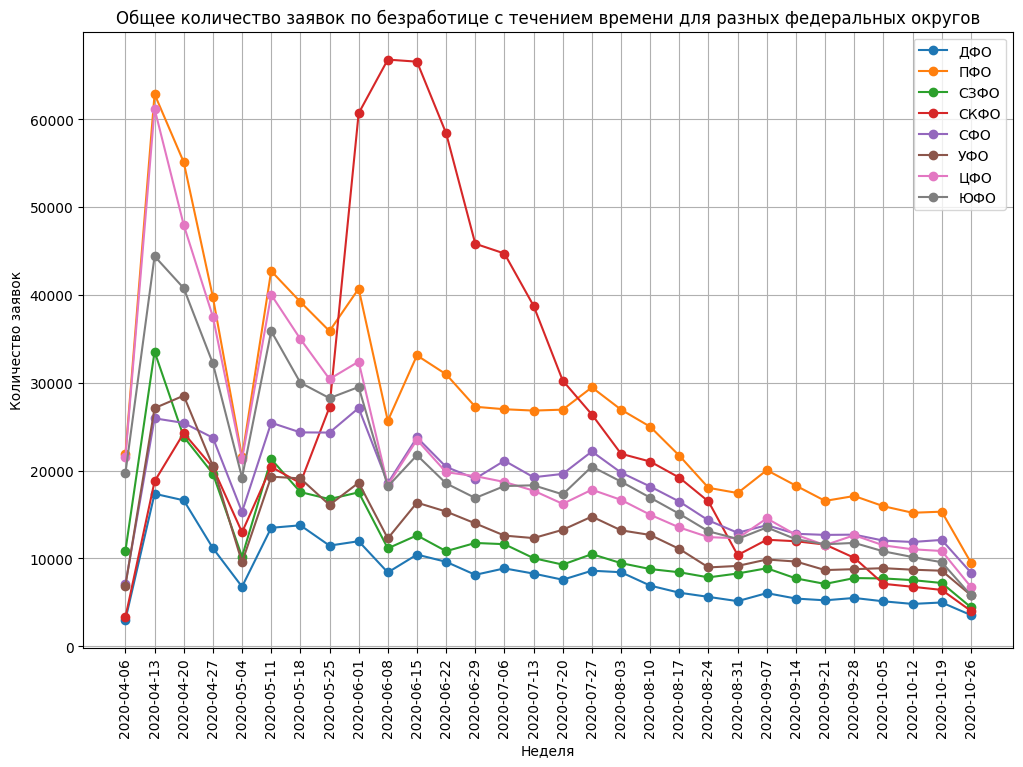

In [ ]:
grouped_data = data.groupby(['week', 'federal_district'])['unemployed'].sum().reset_index()

unique_districts = grouped_data['federal_district'].unique()

plt.figure(figsize=(12, 8))
for district in unique_districts:
    district_data = grouped_data[grouped_data['federal_district'] == district]
    plt.plot(district_data['week'], district_data['unemployed'], label=district, marker='o')

plt.title('Общее количество заявок по безработице с течением времени для разных федеральных округов')
plt.xlabel('Неделя')
plt.ylabel('Количество заявок')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

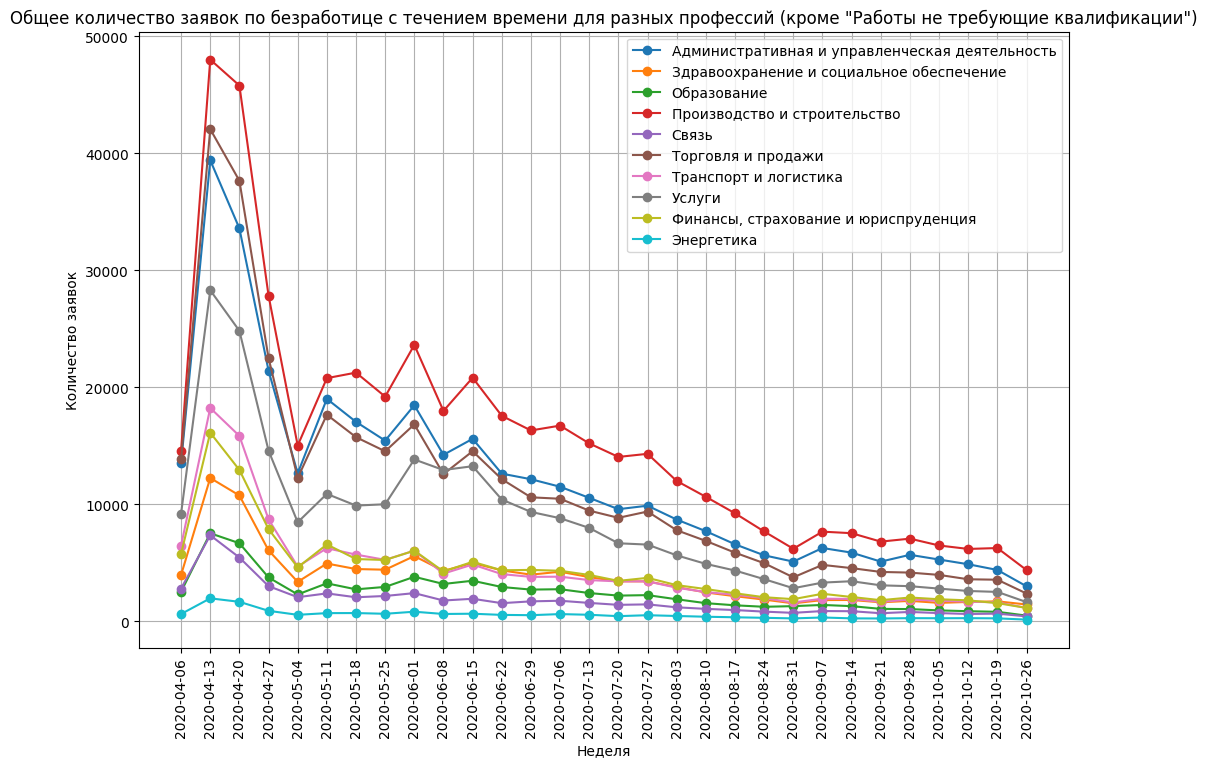

In [ ]:
filtered_data = data[data['oced'] != 'Работы, не требующие квалификации']
grouped_data = filtered_data.groupby(['week', 'oced'])['unemployed'].sum().reset_index()
unique_oced = grouped_data['oced'].unique()
plt.figure(figsize=(12, 8))
for profession in unique_oced:
    profession_data = grouped_data[grouped_data['oced'] == profession]
    plt.plot(profession_data['week'], profession_data['unemployed'], label=profession, marker='o')

plt.title('Общее количество заявок по безработице с течением времени для разных профессий (кроме "Работы не требующие квалификации")')
plt.xlabel('Неделя')
plt.ylabel('Количество заявок')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-22-548be9cddbac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profession_data['growth_rate'] = profession_data['unemployed'].pct_change() * 100
<ipython-input-22-548be9cddbac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profession_data['growth_rate'] = profession_data['unemployed'].pct_change() * 100
<ipython-input-22-548be9cddbac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

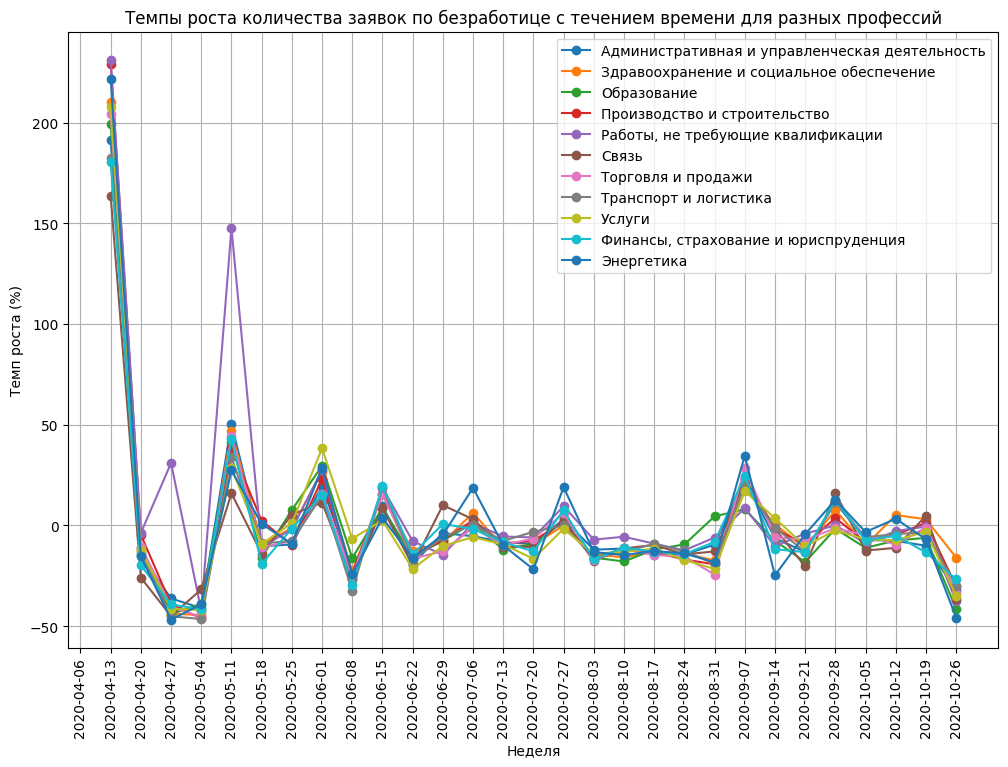

In [ ]:
grouped_data = data.groupby(['week', 'oced'])['unemployed'].sum().reset_index()
growth_rates = pd.DataFrame()
for profession in grouped_data['oced'].unique():
    profession_data = grouped_data[grouped_data['oced'] == profession]
    profession_data['growth_rate'] = profession_data['unemployed'].pct_change() * 100
    growth_rates = pd.concat([growth_rates, profession_data], ignore_index=True)
plt.figure(figsize=(12, 8))
for profession in growth_rates['oced'].unique():
    profession_data = growth_rates[growth_rates['oced'] == profession]
    plt.plot(profession_data['week'], profession_data['growth_rate'], label=profession, marker='o')

plt.title('Темпы роста количества заявок по безработице с течением времени для разных профессий')
plt.xlabel('Неделя')
plt.ylabel('Темп роста (%)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-23-0e07d5cb61e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profession_data['growth_rate'] = profession_data['unemployed'].pct_change() * 100
<ipython-input-23-0e07d5cb61e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profession_data['growth_rate'] = profession_data['unemployed'].pct_change() * 100
<ipython-input-23-0e07d5cb61e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

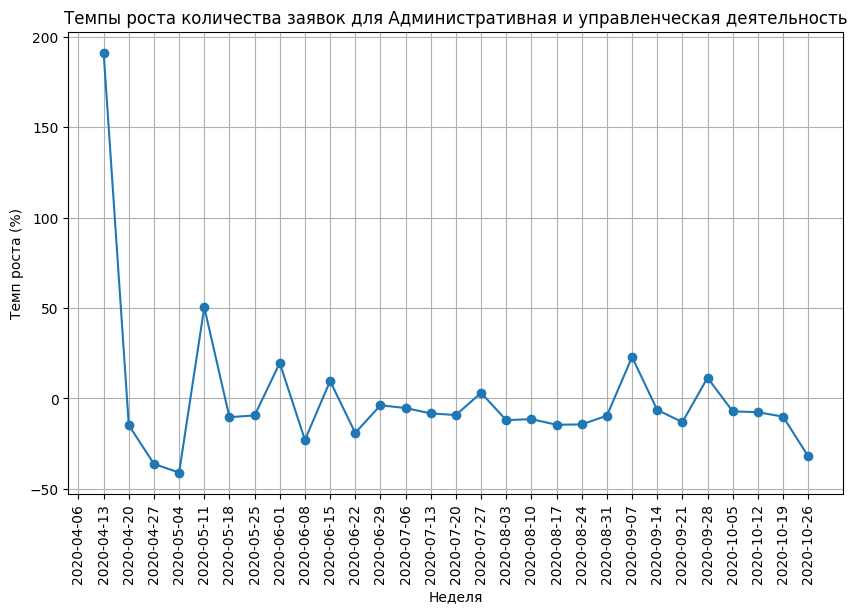

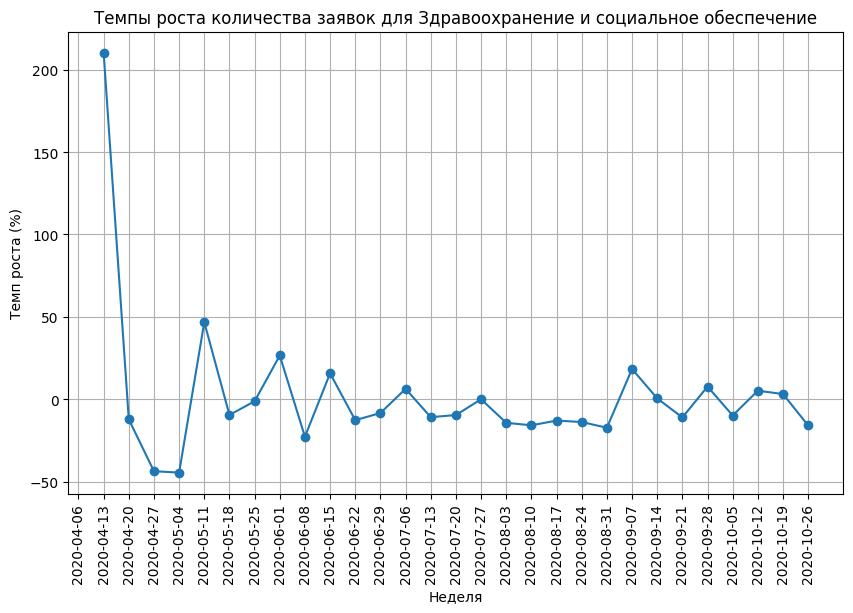

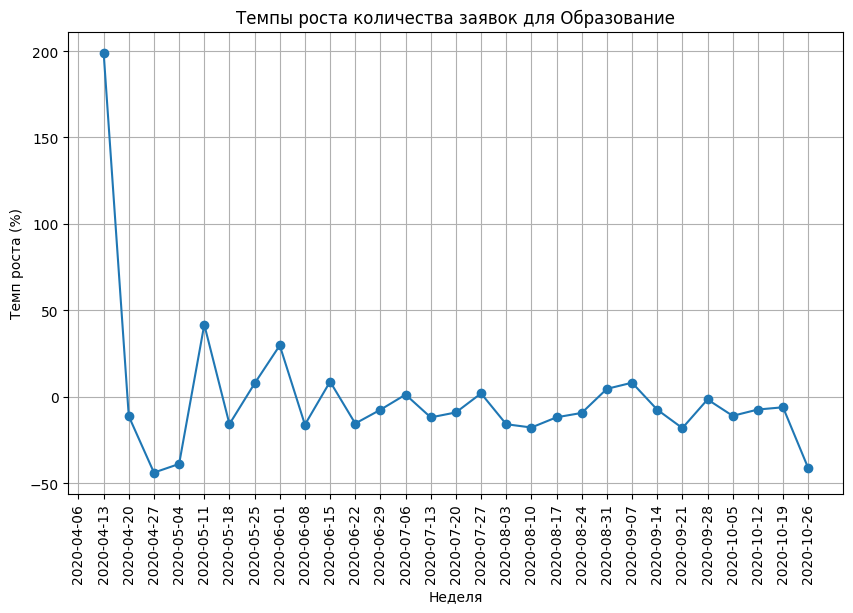

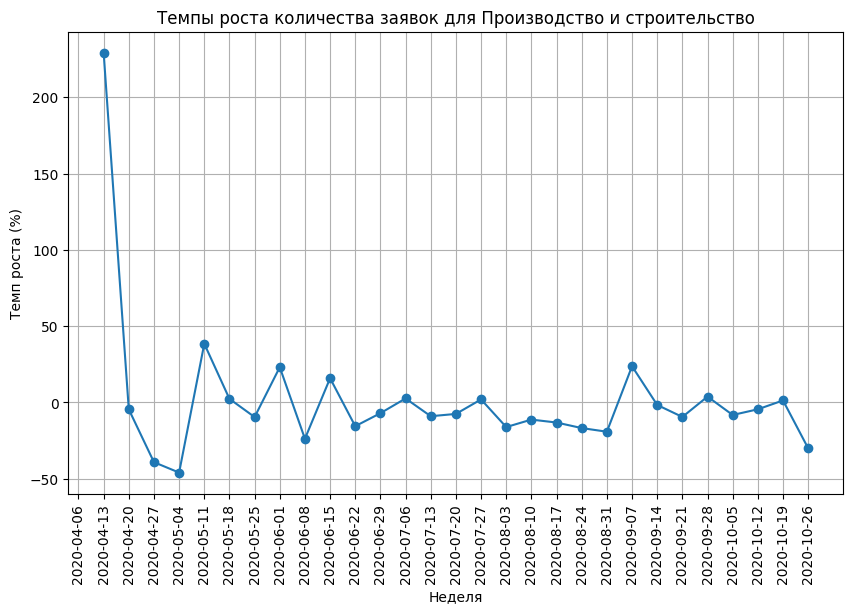

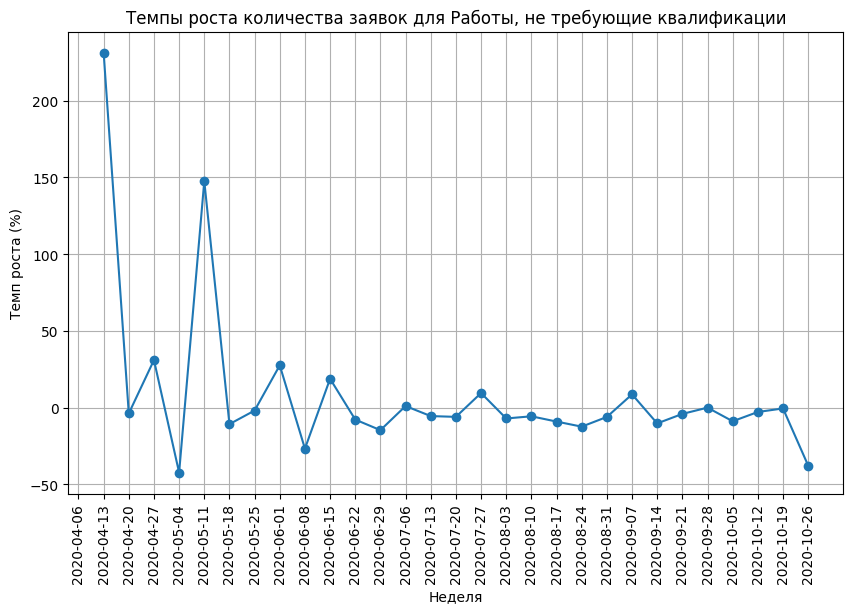

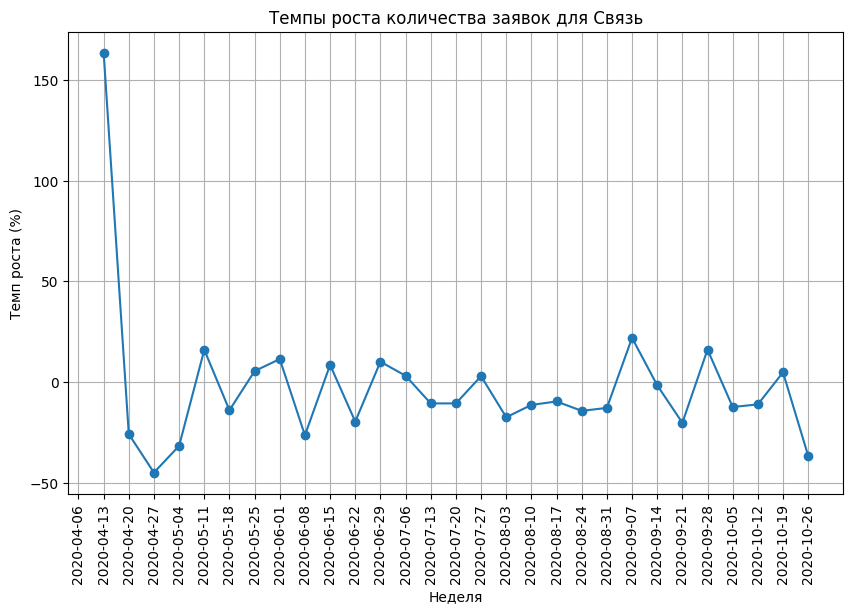

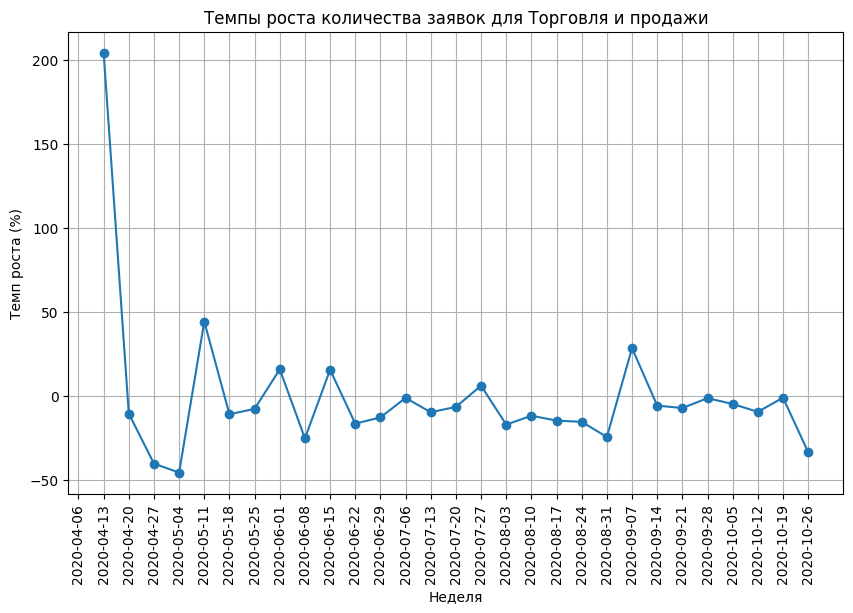

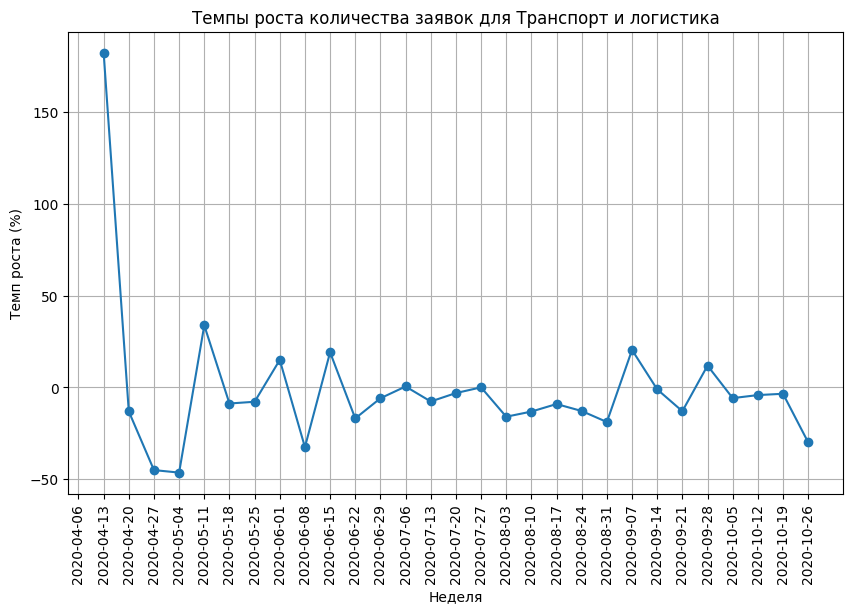

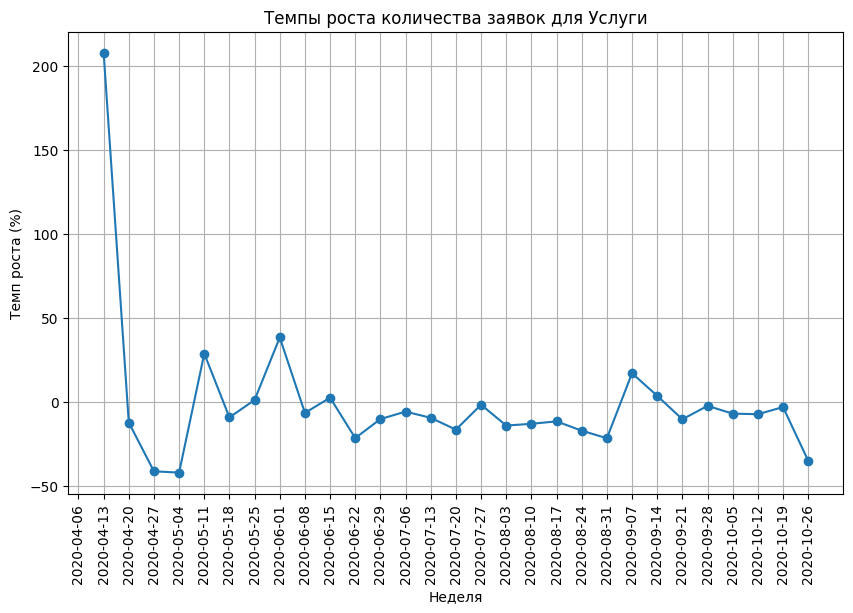

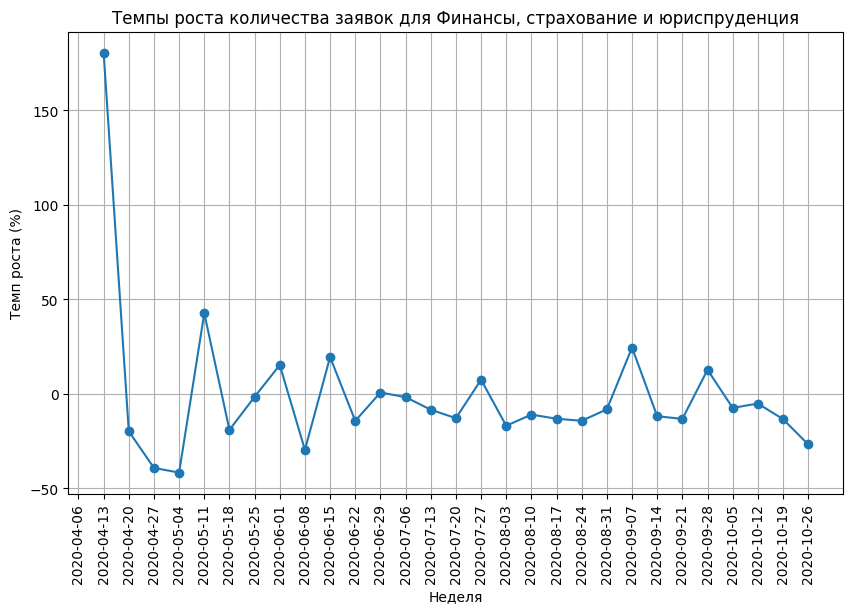

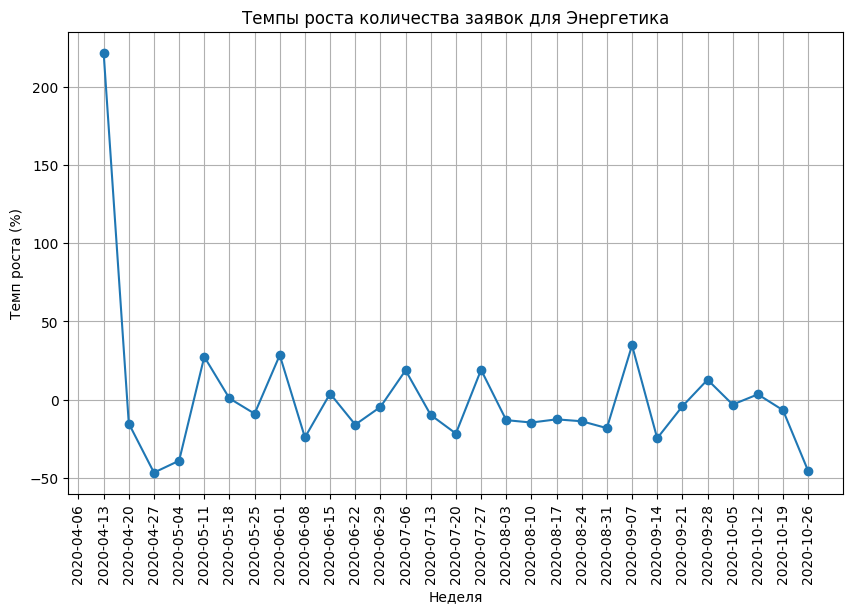

In [ ]:
growth_rates = pd.DataFrame()
for profession in grouped_data['oced'].unique():
    profession_data = grouped_data[grouped_data['oced'] == profession]
    profession_data['growth_rate'] = profession_data['unemployed'].pct_change() * 100
    growth_rates = pd.concat([growth_rates, profession_data], ignore_index=True)
unique_oced_values = growth_rates['oced'].unique()
for profession in unique_oced_values:
    profession_data = growth_rates[growth_rates['oced'] == profession]

    plt.figure(figsize=(10, 6))
    plt.plot(profession_data['week'], profession_data['growth_rate'], marker='o')
    plt.title(f'Темпы роста количества заявок для {profession}')
    plt.xlabel('Неделя')
    plt.ylabel('Темп роста (%)')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

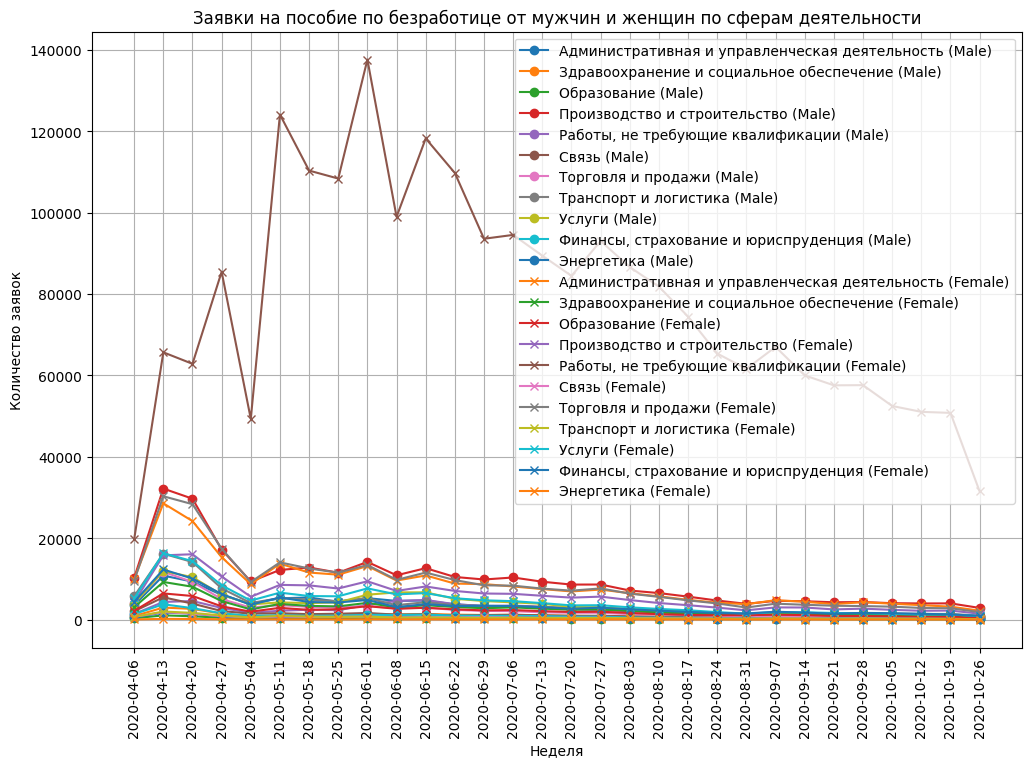

In [116]:

data['female_cv'] = data['unemployed'] - data['cv_gender']
male_data = data[data['cv_gender'] > 0].groupby(['week', 'oced'])['cv_gender'].sum().reset_index()

female_data = data.groupby(['week', 'oced'])['female_cv'].sum().reset_index()

plt.figure(figsize=(12, 8))

for field in male_data['oced'].unique():
    field_data_male = male_data[male_data['oced'] == field]
    plt.plot(field_data_male['week'], field_data_male['cv_gender'], label=f"{field} (Male)", marker='o')

for field in female_data['oced'].unique():
    field_data_female = female_data[female_data['oced'] == field]
    plt.plot(field_data_female['week'], field_data_female['female_cv'], label=f"{field} (Female)", marker='x')

plt.title('Заявки на пособие по безработице от мужчин и женщин по сферам деятельности')
plt.xlabel('Неделя')
plt.ylabel('Количество заявок')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

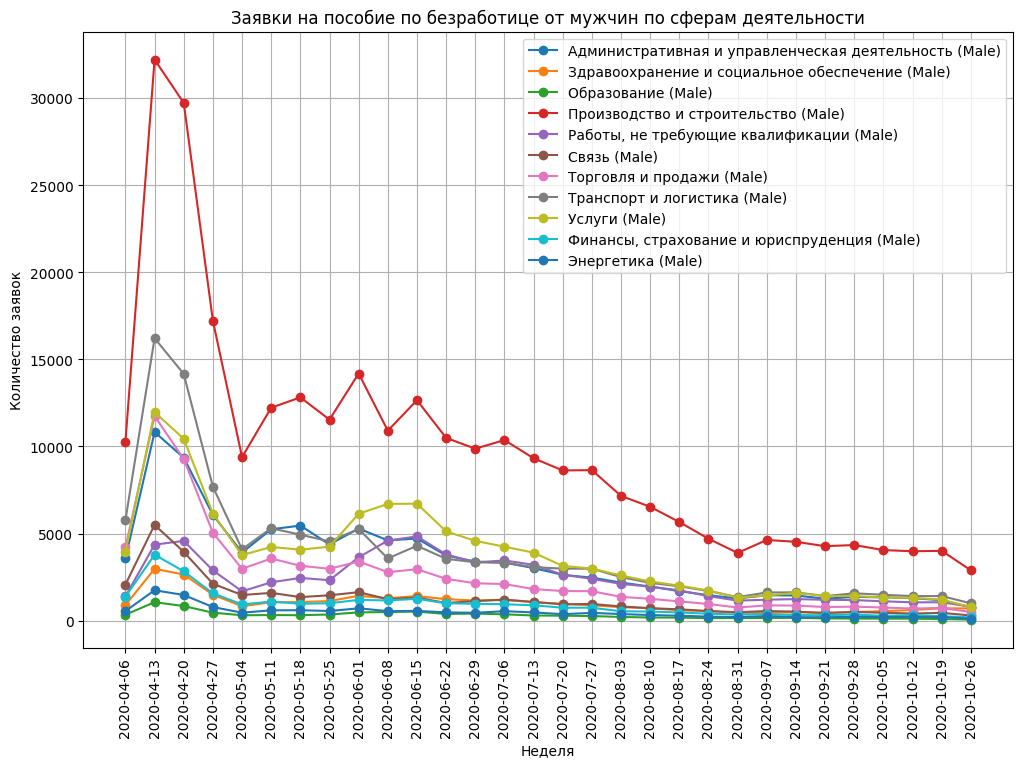

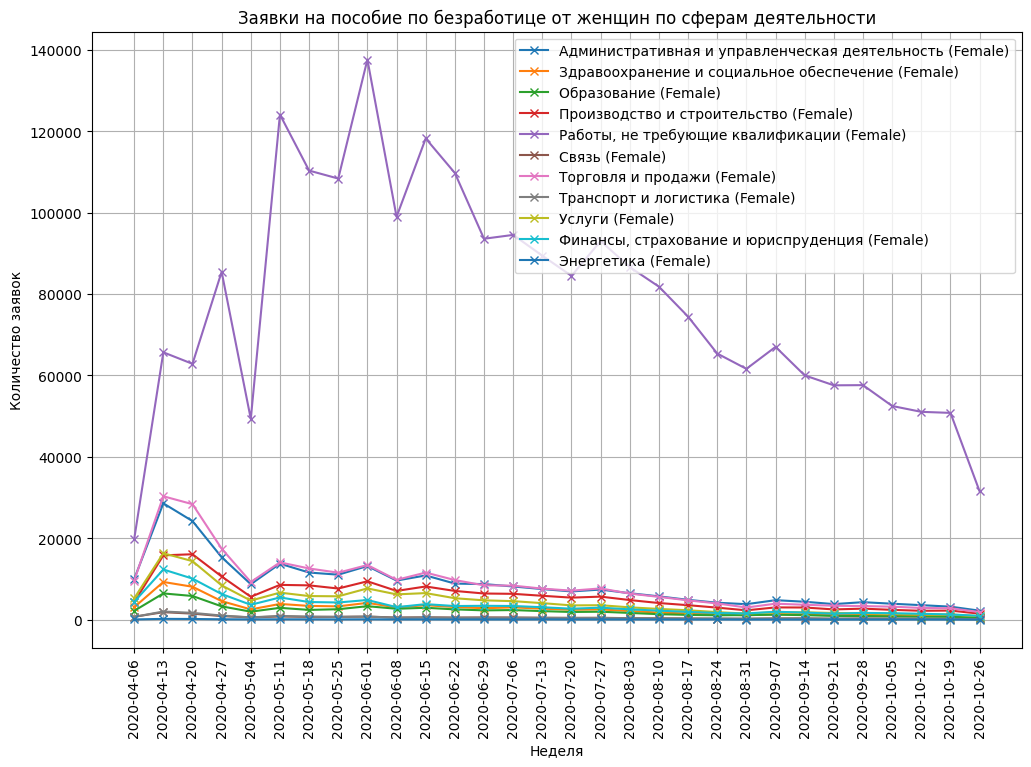

In [117]:
plt.figure(figsize=(12, 8))


for field in male_data['oced'].unique():
    field_data_male = male_data[male_data['oced'] == field]
    plt.plot(field_data_male['week'], field_data_male['cv_gender'], label=f"{field} (Male)", marker='o')

plt.title('Заявки на пособие по безработице от мужчин по сферам деятельности')
plt.xlabel('Неделя')
plt.ylabel('Количество заявок')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))


for field in female_data['oced'].unique():
    field_data_female = female_data[female_data['oced'] == field]
    plt.plot(field_data_female['week'], field_data_female['female_cv'], label=f"{field} (Female)", marker='x')


plt.title('Заявки на пособие по безработице от женщин по сферам деятельности')
plt.xlabel('Неделя')
plt.ylabel('Количество заявок')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

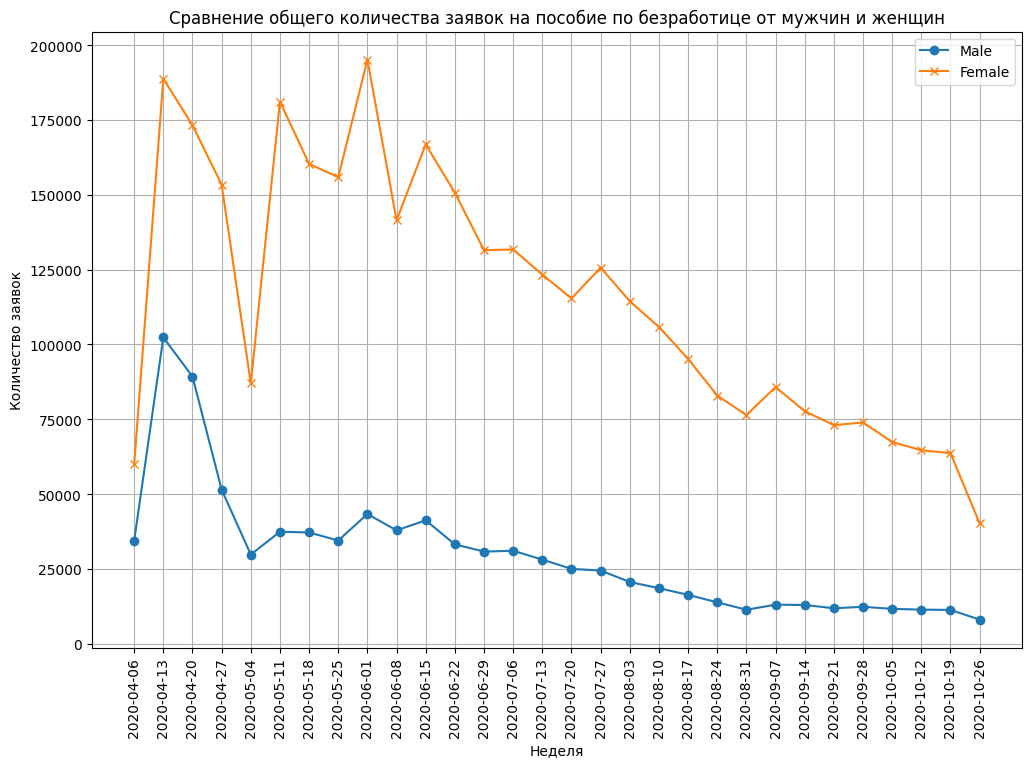

In [118]:
total_male_data = data[data['cv_gender'] > 0].groupby('week')['cv_gender'].sum().reset_index()
total_female_data = data.groupby('week')['female_cv'].sum().reset_index()


plt.figure(figsize=(12, 8))


plt.plot(total_male_data['week'], total_male_data['cv_gender'], label='Male', marker='o')


plt.plot(total_female_data['week'], total_female_data['female_cv'], label='Female', marker='x')


plt.title('Сравнение общего количества заявок на пособие по безработице от мужчин и женщин')
plt.xlabel('Неделя')
plt.ylabel('Количество заявок')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

Выше все ок, проблема со счетом заболеваний!


In [ ]:


first_infections = data.groupby(['region', 'week'])['infections'].first().reset_index()

merged_data = pd.merge(first_infections, data[['region', 'week']], on=['region', 'week'])

total_infections_by_district = merged_data.groupby(['week', 'region'])['infections'].sum().reset_index()

print(total_infections_by_district)


            week             region  infections
0     2020-04-06             Адыгея      1260.0
1     2020-04-06              Алтай       432.0
2     2020-04-06     Алтайский край      3379.0
3     2020-04-06           Амурская       870.0
4     2020-04-06      Архангельская      5160.0
...          ...                ...         ...
2455  2020-10-26        Челябинская     27324.0
2456  2020-10-26              Чечня      1479.0
2457  2020-10-26            Чувашия     10614.0
2458  2020-10-26  Ямало-Ненецкий АО     39034.0
2459  2020-10-26        Ярославская     22330.0

[2460 rows x 3 columns]


In [ ]:
unique_infections_by_region_week = data.drop_duplicates(['region', 'week', 'infections'])

# Суммируем уникальные значения 'infections' для каждой комбинации 'region' и 'week'
total_infections_by_district = unique_infections_by_region_week.groupby(['week', 'region'])['infections'].sum().reset_index()

# Вывод результатов
print(total_infections_by_district)

            week             region  infections
0     2020-04-06             Адыгея        42.0
1     2020-04-06              Алтай        16.0
2     2020-04-06     Алтайский край       109.0
3     2020-04-06           Амурская        30.0
4     2020-04-06      Архангельская       172.0
...          ...                ...         ...
2455  2020-10-26        Челябинская       828.0
2456  2020-10-26              Чечня        51.0
2457  2020-10-26            Чувашия       366.0
2458  2020-10-26  Ямало-Ненецкий АО      1346.0
2459  2020-10-26        Ярославская       770.0

[2460 rows x 3 columns]


In [ ]:
unique_infections_by_region_week = data.drop_duplicates(['region', 'week', 'infections'])
grouped_data = unique_infections_by_region_week.groupby(['region', 'week'])['infections'].sum().reset_index()


total_infections_by_region = grouped_data.groupby('region')['infections'].sum().reset_index()



print(total_infections_by_region)

               region  infections
0              Адыгея      5828.0
1               Алтай      7296.0
2      Алтайский край     18628.0
3            Амурская      7313.0
4       Архангельская     21299.0
..                ...         ...
77        Челябинская     18836.0
78              Чечня      3408.0
79            Чувашия      9447.0
80  Ямало-Ненецкий АО     19261.0
81        Ярославская     11522.0

[82 rows x 2 columns]


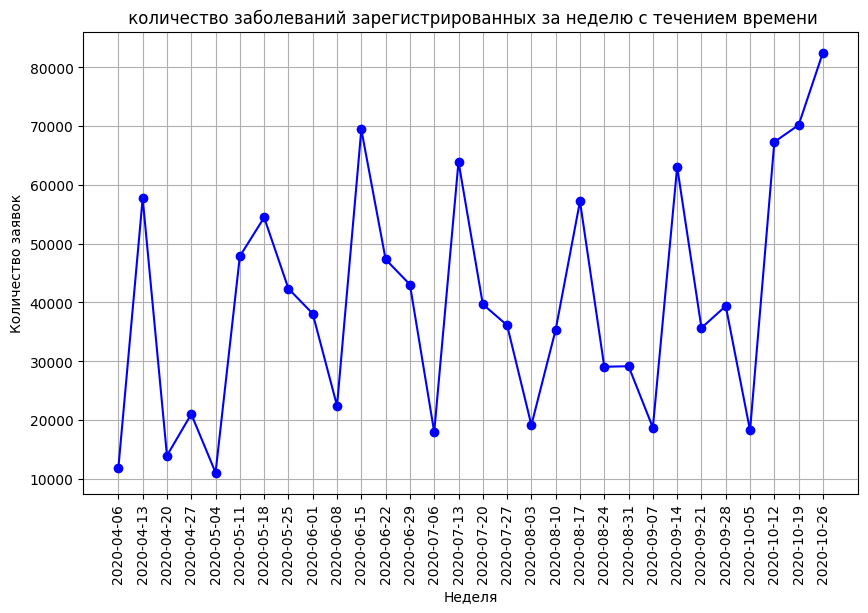

In [ ]:
unique_infections_by_region_week = data.drop_duplicates(['region', 'week', 'infections'])
total_claims = unique_infections_by_region_week.groupby('week')['infections'].sum()

plt.figure(figsize=(10, 6))
plt.plot(total_claims.index, total_claims.values, marker='o', linestyle='-', color='b')
plt.title(' количество заболеваний зарегистрированных за неделю с течением времени')
plt.xlabel('Неделя')
plt.ylabel('Количество заявок')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


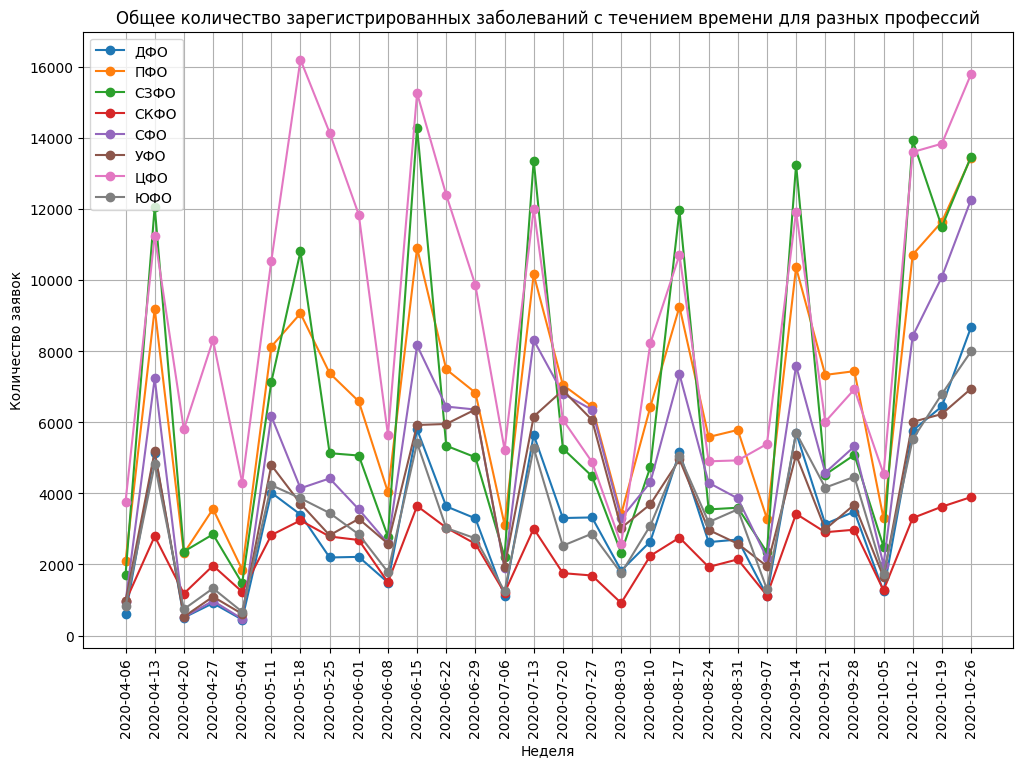

In [ ]:
unique_infections_by_region_week = data.drop_duplicates(['region', 'week', 'infections'])
grouped_data = unique_infections_by_region_week.groupby(['week', 'federal_district'])['infections'].sum().reset_index()

unique_dist = grouped_data['federal_district'].unique()

plt.figure(figsize=(12, 8))
for distus in unique_dist:
    dist_data = grouped_data[grouped_data['federal_district'] == distus]
    plt.plot(dist_data['week'], dist_data['infections'], label=distus, marker='o')

plt.title('Общее количество зарегистрированных заболеваний с течением времени для разных профессий')
plt.xlabel('Неделя')
plt.ylabel('Количество заявок')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

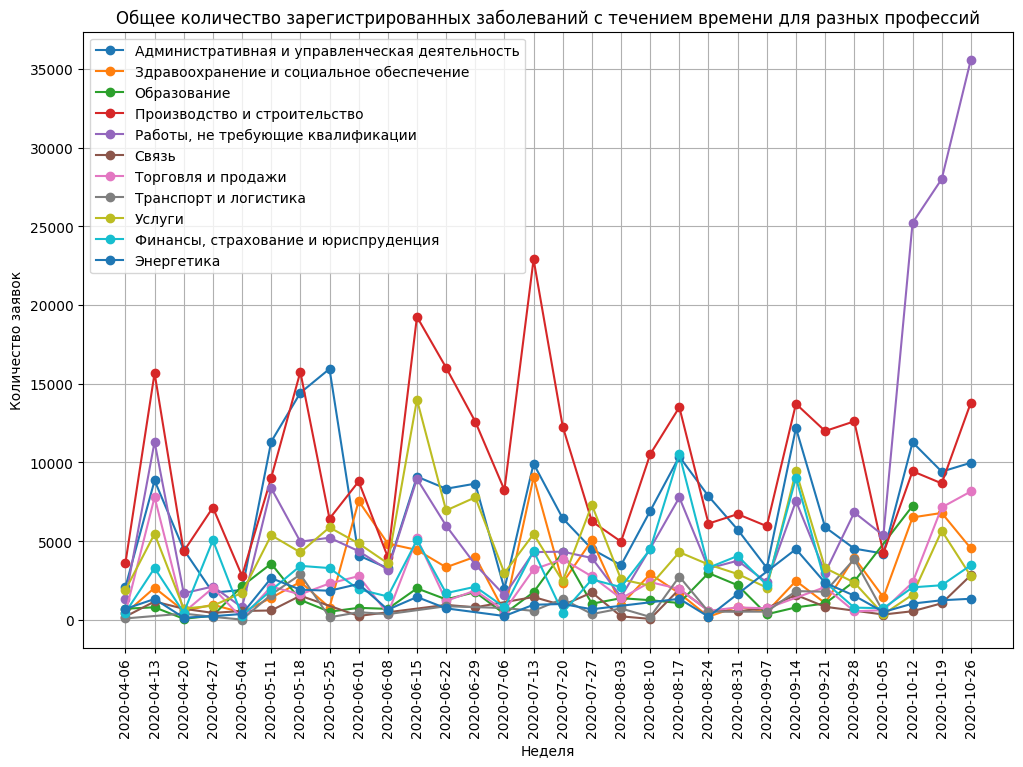

In [ ]:
unique_infections_by_region_week = data.drop_duplicates(['region', 'week', 'infections'])
grouped_data = unique_infections_by_region_week.groupby(['week', 'oced'])['infections'].sum().reset_index()

unique_oced = grouped_data['oced'].unique()

plt.figure(figsize=(12, 8))
for profession in unique_oced:
    profession_data = grouped_data[grouped_data['oced'] == profession]
    plt.plot(profession_data['week'], profession_data['infections'], label=profession, marker='o')

plt.title('Общее количество зарегистрированных заболеваний с течением времени для разных профессий')
plt.xlabel('Неделя')
plt.ylabel('Количество заявок')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-82-48c52fdce580>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-48c52fdce580>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-48c52fdce580>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-48c52fd

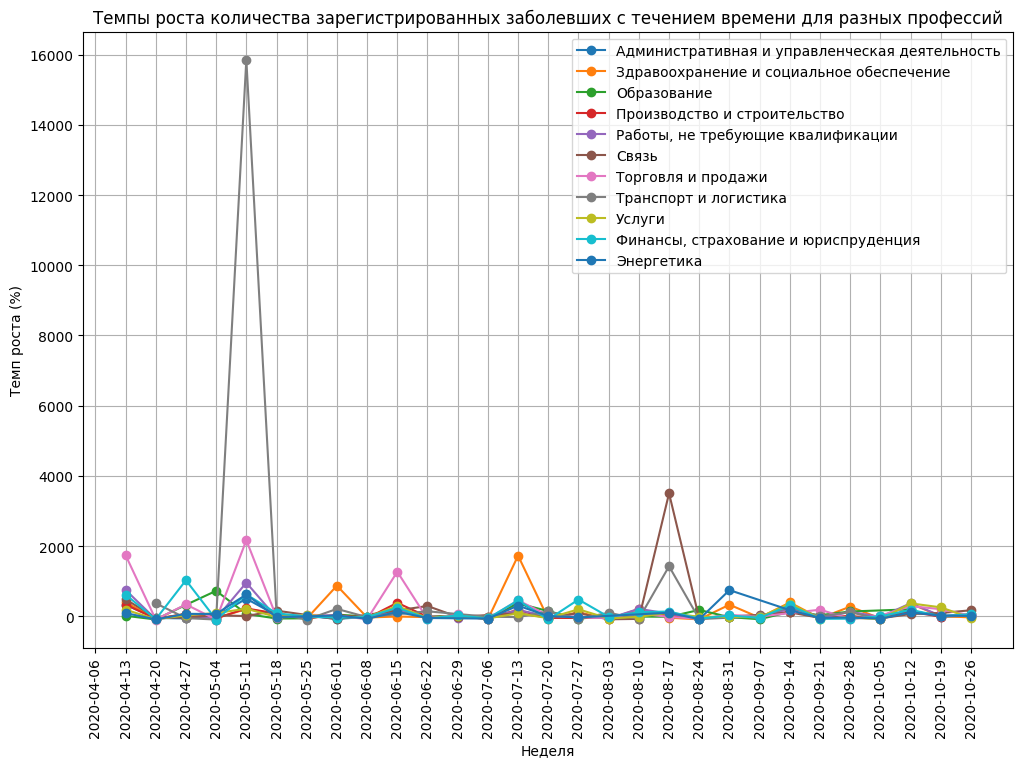

In [ ]:
unique_infections_by_region_week = data.drop_duplicates(['region', 'week', 'infections'])
grouped_data = unique_infections_by_region_week.groupby(['week', 'oced'])['infections'].sum().reset_index()
growth_rates = pd.DataFrame()
for profession in grouped_data['oced'].unique():
    profession_data = grouped_data[grouped_data['oced'] == profession]
    profession_data['growth_rate'] = profession_data['infections'].pct_change() * 100
    growth_rates = pd.concat([growth_rates, profession_data], ignore_index=True)
plt.figure(figsize=(12, 8))
for profession in growth_rates['oced'].unique():
    profession_data = growth_rates[growth_rates['oced'] == profession]
    plt.plot(profession_data['week'], profession_data['growth_rate'], label=profession, marker='o')

plt.title('Темпы роста количества зарегистрированных заболевших с течением времени для разных профессий')
plt.xlabel('Неделя')
plt.ylabel('Темп роста (%)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-83-b7162420f3ab>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-b7162420f3ab>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-b7162420f3ab>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-83-b716242

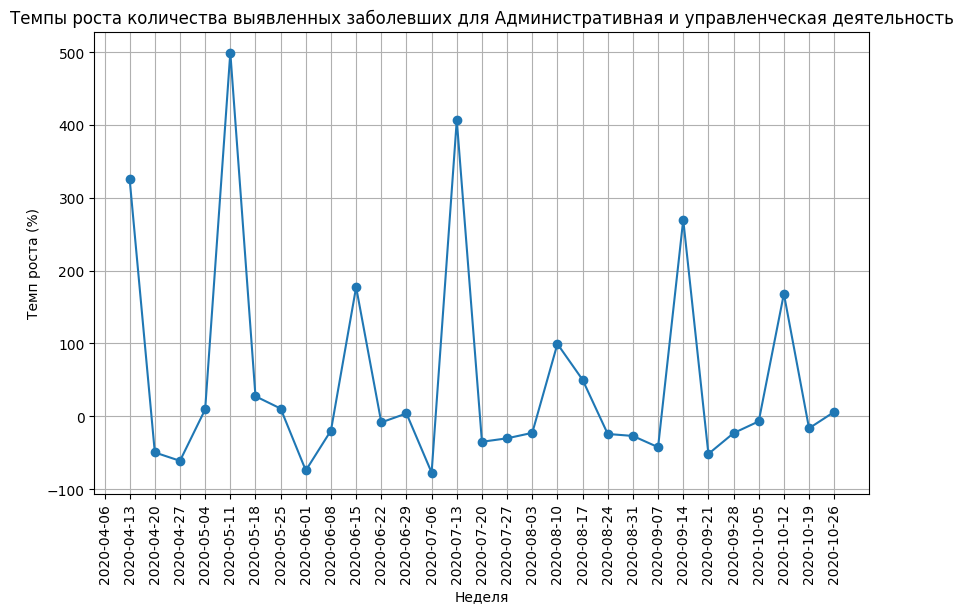

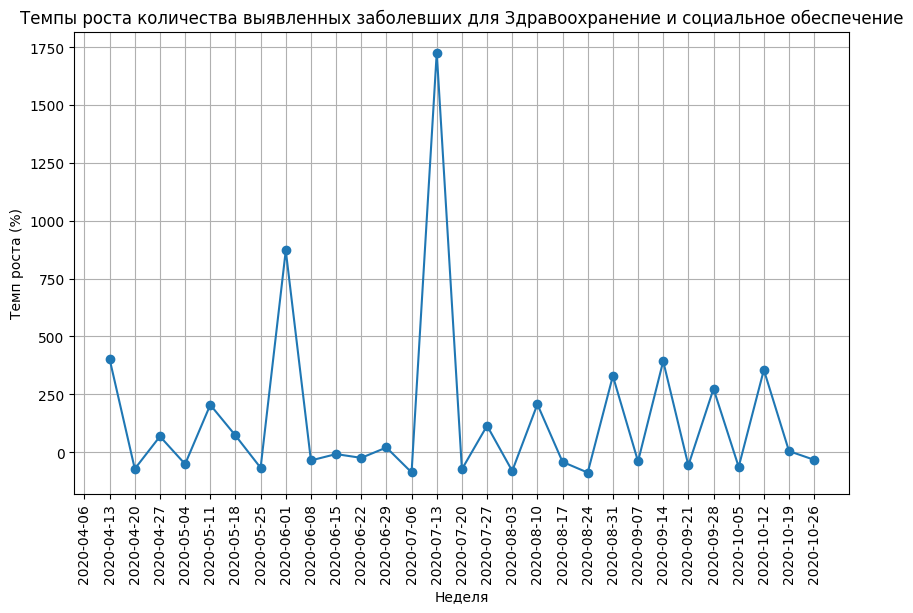

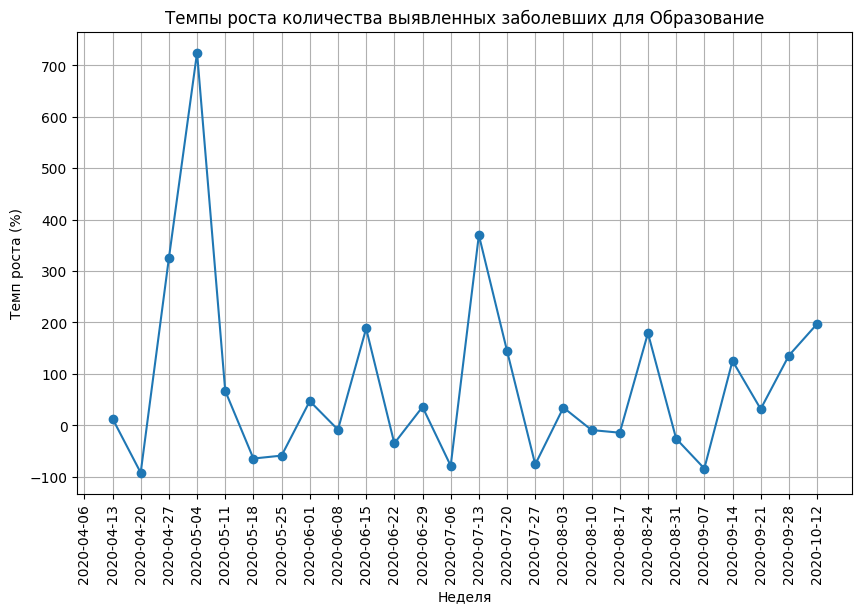

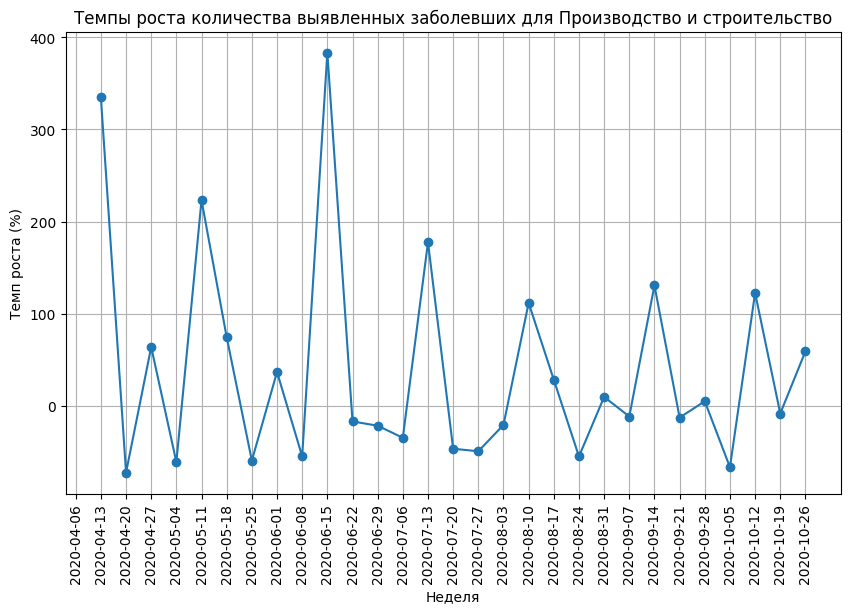

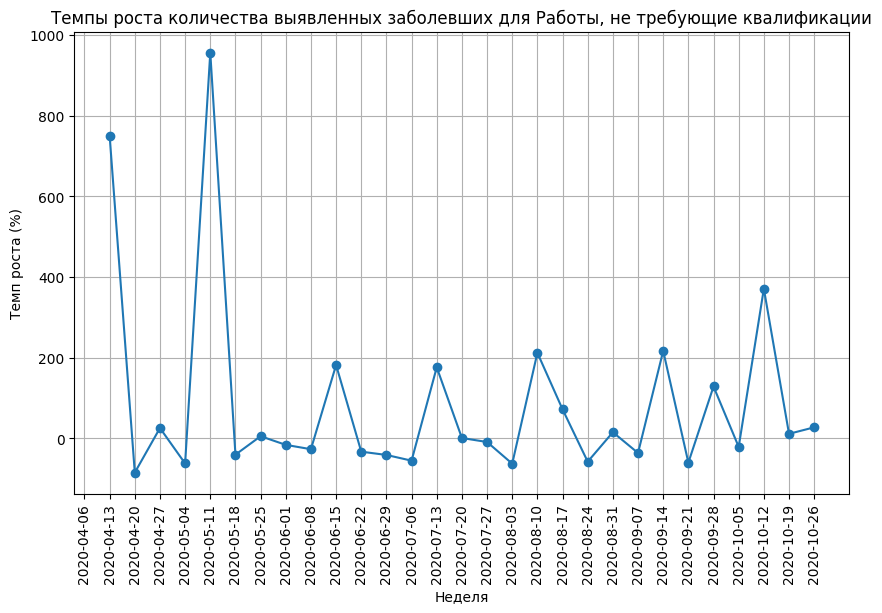

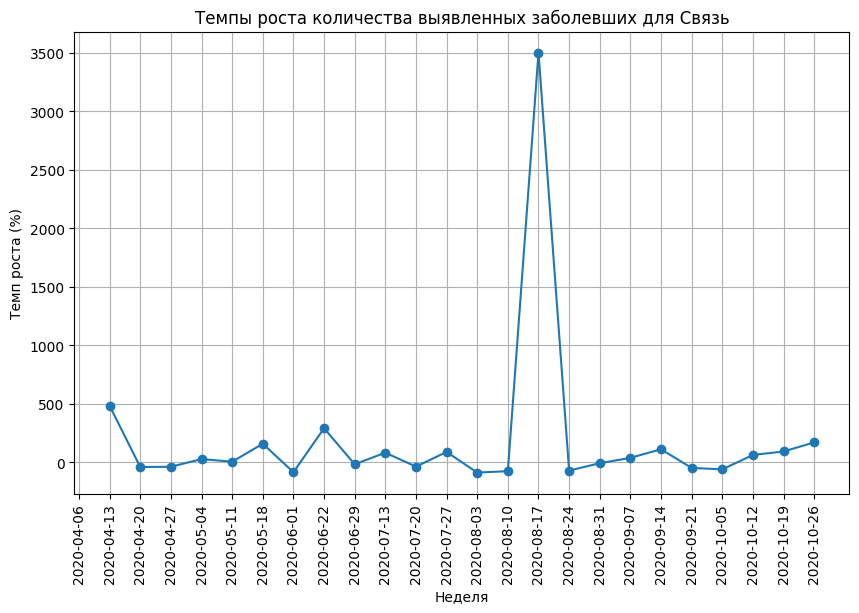

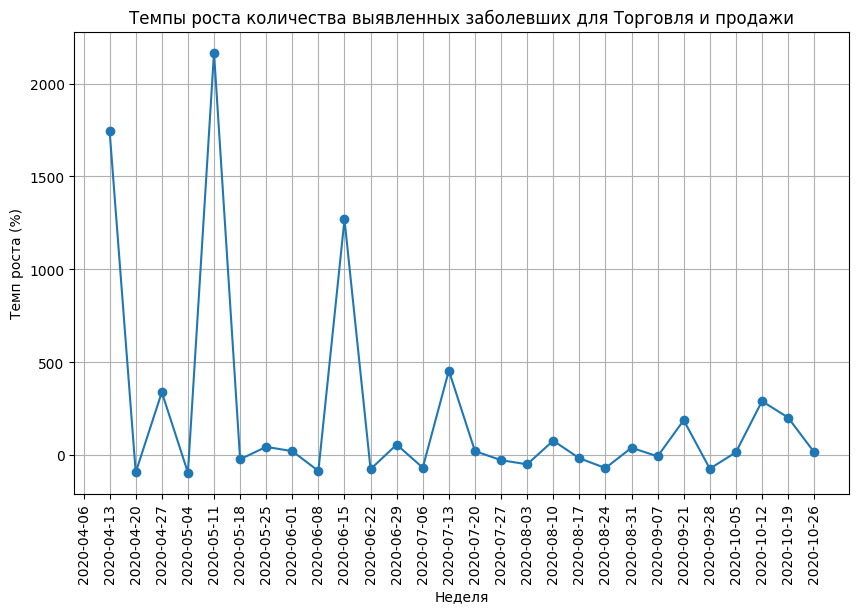

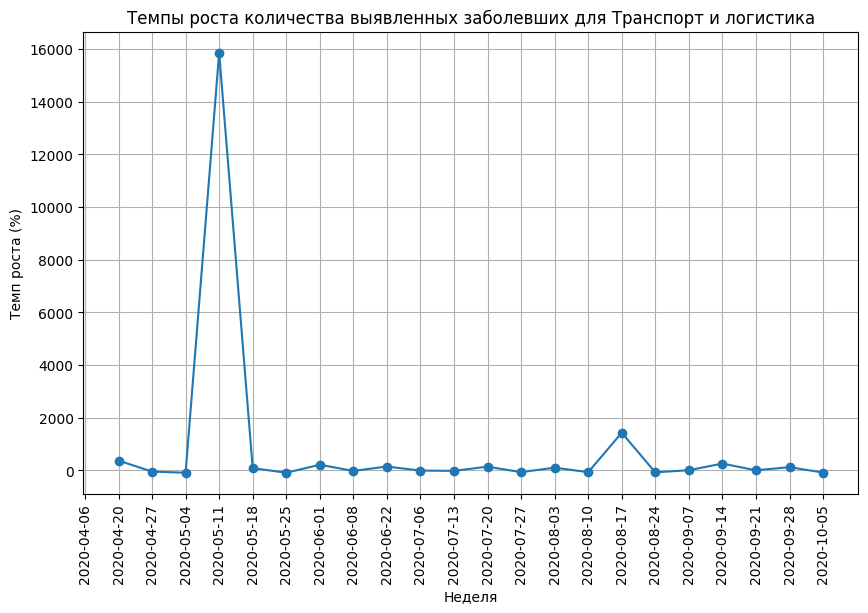

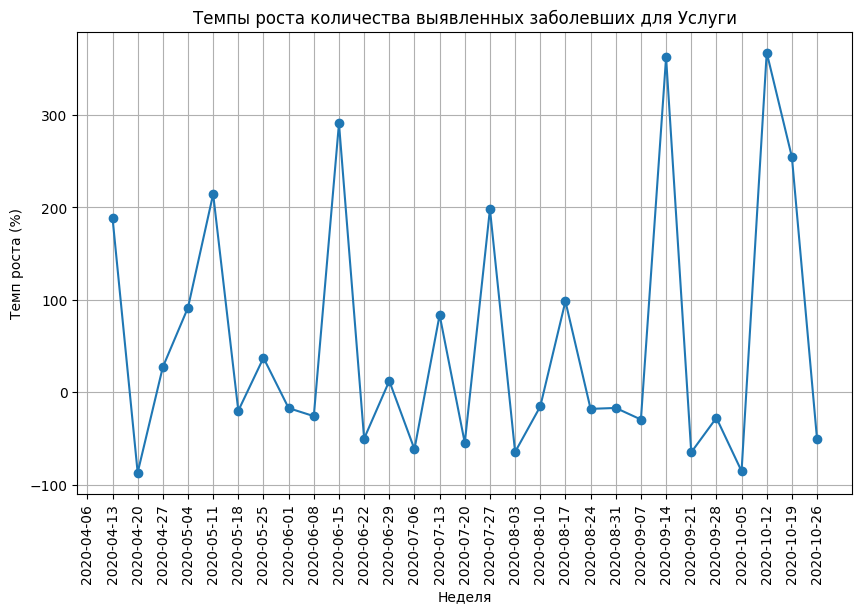

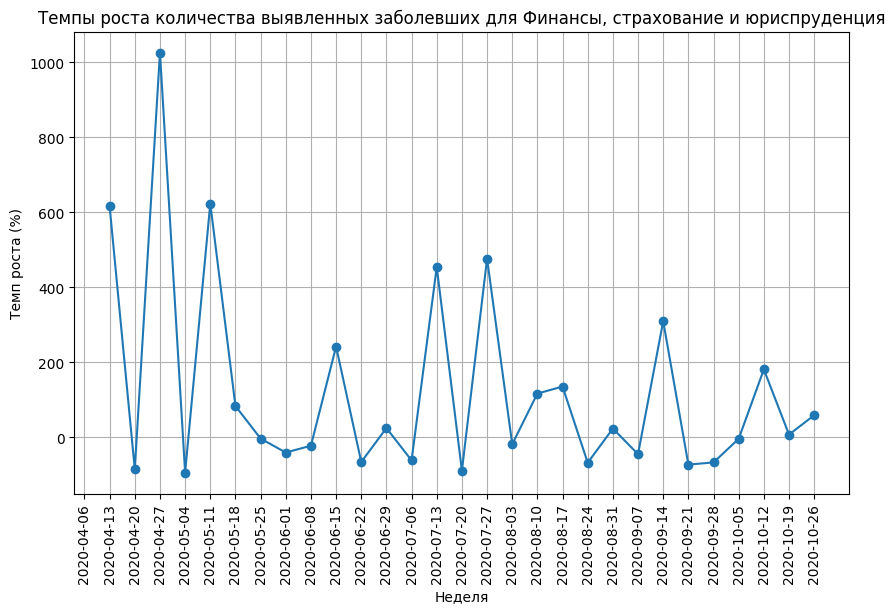

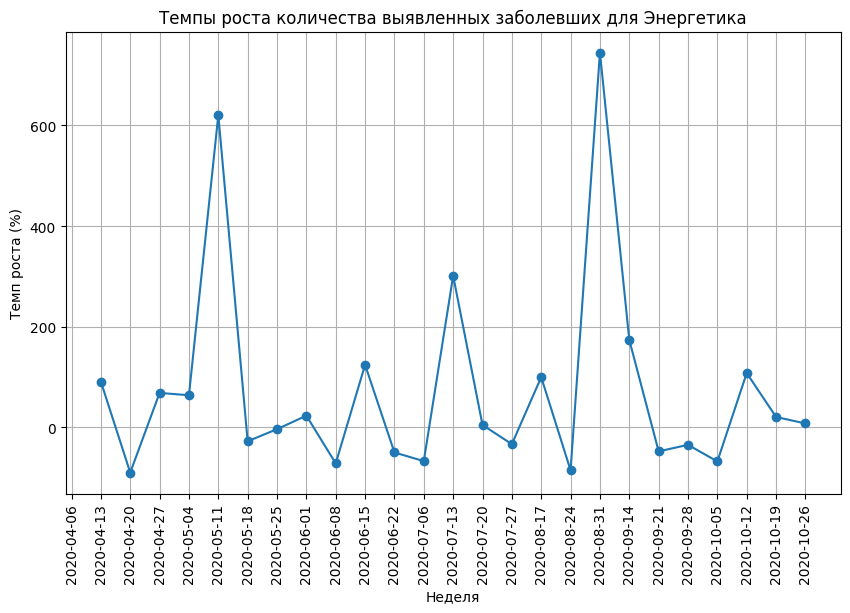

In [ ]:
growth_rates = pd.DataFrame()
for profession in grouped_data['oced'].unique():
    profession_data = grouped_data[grouped_data['oced'] == profession]
    profession_data['growth_rate'] = profession_data['infections'].pct_change() * 100
    growth_rates = pd.concat([growth_rates, profession_data], ignore_index=True)
unique_oced_values = growth_rates['oced'].unique()
for profession in unique_oced_values:
    profession_data = growth_rates[growth_rates['oced'] == profession]

    plt.figure(figsize=(10, 6))
    plt.plot(profession_data['week'], profession_data['growth_rate'], marker='o')
    plt.title(f'Темпы роста количества выявленных заболевших для {profession}')
    plt.xlabel('Неделя')
    plt.ylabel('Темп роста (%)')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

In [ ]:
#с яндексом все ок

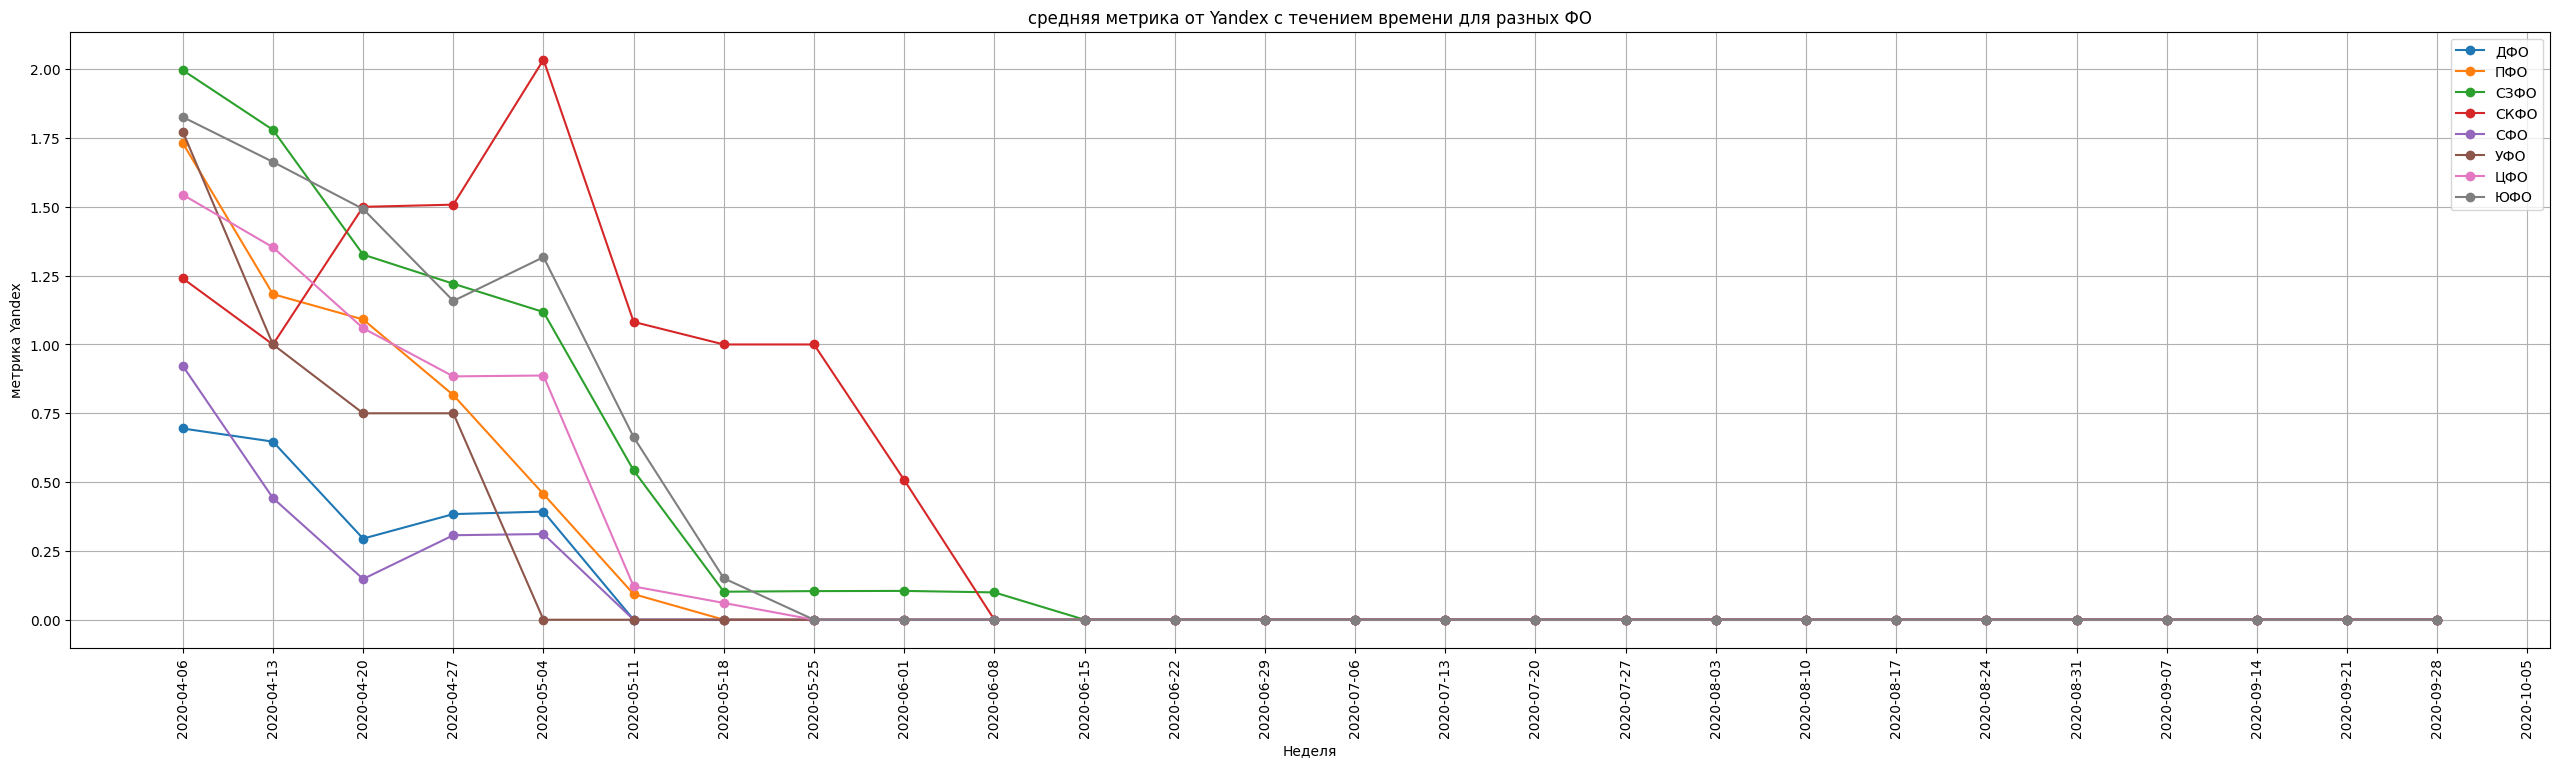

In [ ]:
grouped_data = data.groupby(['week', 'federal_district'])['yandex_level'].mean().reset_index()
unique_regions = grouped_data['federal_district'].unique()
plt.figure(figsize=(32, 8))
for region in unique_regions:
    region_data = grouped_data[grouped_data['federal_district'] == region]
    plt.plot(region_data['week'], region_data['yandex_level'], label=region, marker='o')

plt.title('средняя метрика от Yandex с течением времени для разных ФО')
plt.xlabel('Неделя')
plt.ylabel('метрика Yandex')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

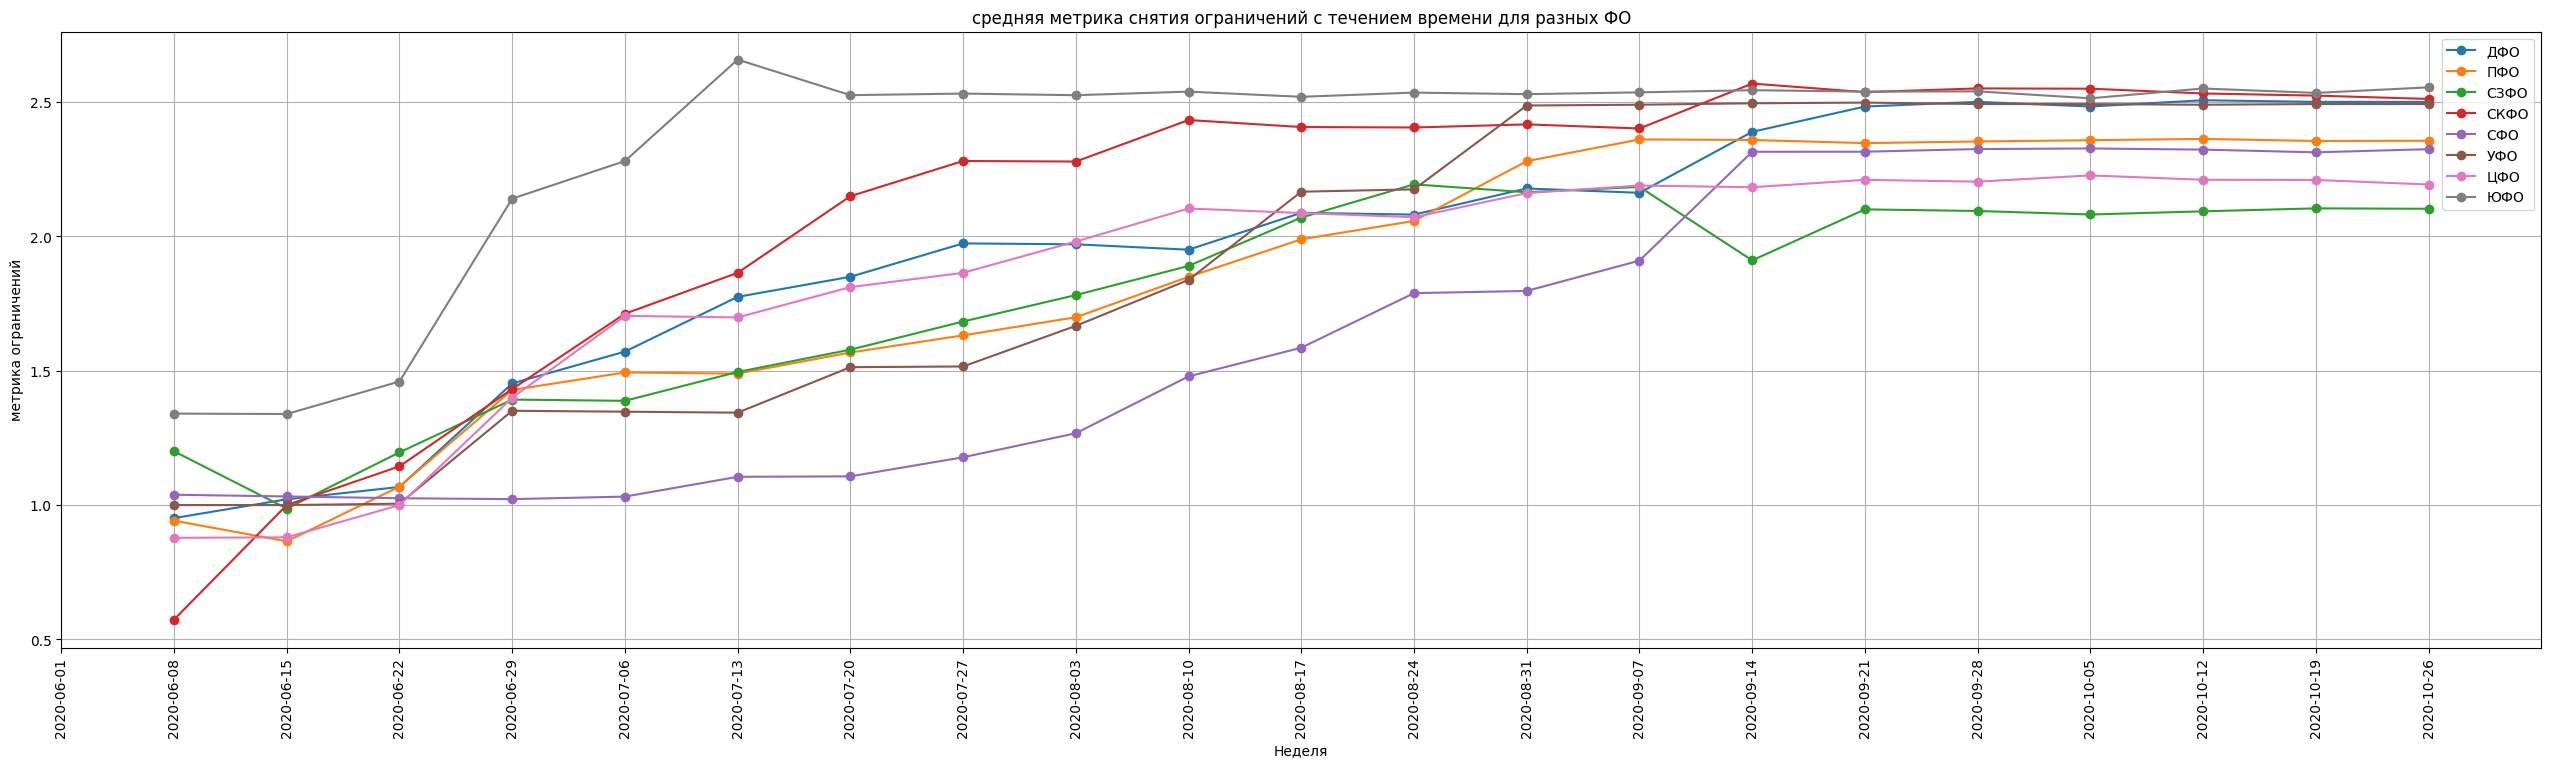

In [ ]:
grouped_data = data.groupby(['week', 'federal_district'])['level'].mean().reset_index()
unique_regions = grouped_data['federal_district'].unique()
plt.figure(figsize=(32, 8))
for region in unique_regions:
    region_data = grouped_data[grouped_data['federal_district'] == region]
    plt.plot(region_data['week'], region_data['level'], label=region, marker='o')

plt.title('средняя метрика снятия ограничений с течением времени для разных ФО')
plt.xlabel('Неделя')
plt.ylabel('метрика ограничений')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

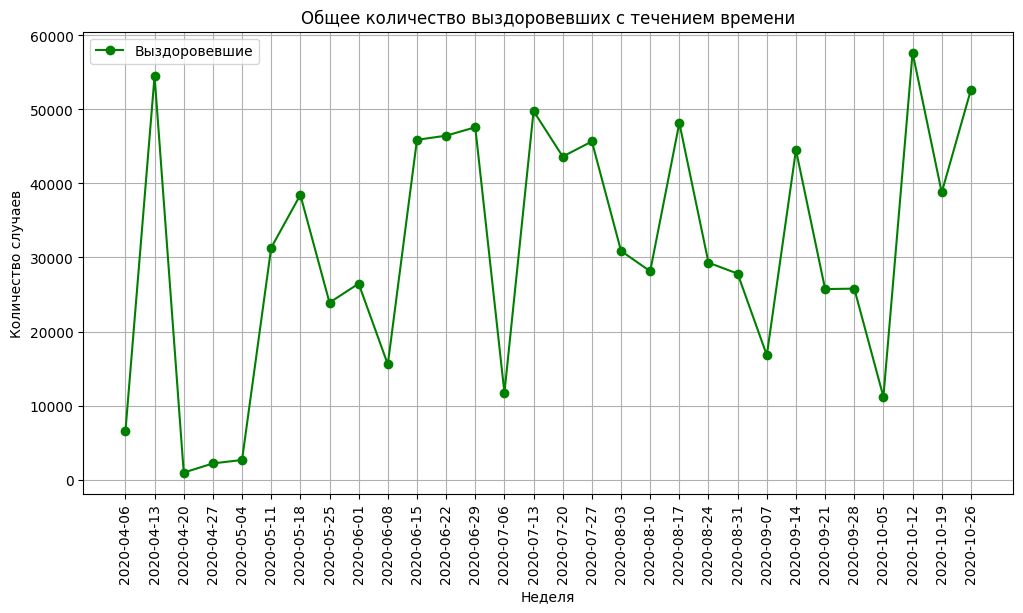

In [ ]:
unique_healed_by_region_week = data.drop_duplicates(['region', 'week', 'healed'])
total_heals = unique_healed_by_region_week.groupby('week')['healed'].sum()
plt.figure(figsize=(12, 6))
plt.plot(total_heals.index, total_heals.values, marker='o', linestyle='-', color='g', label='Выздоровевшие')

plt.title('Общее количество выздоровевших с течением времени')
plt.xlabel('Неделя')
plt.ylabel('Количество случаев')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

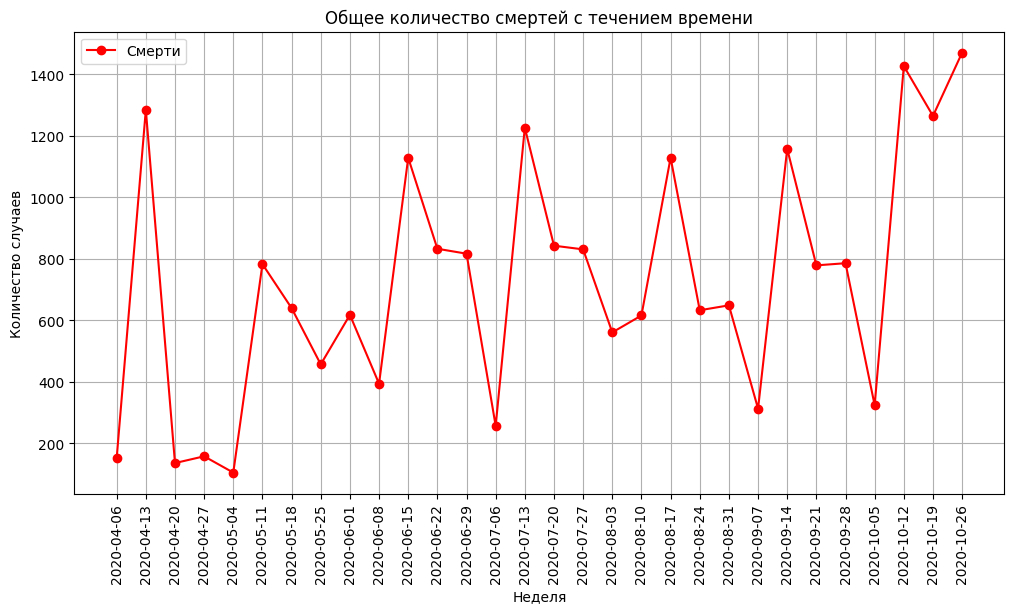

In [ ]:
unique_deaths_by_region_week = data.drop_duplicates(['region', 'week', 'deaths'])

total_deaths = unique_deaths_by_region_week.groupby('week')['deaths'].sum()
plt.figure(figsize=(12, 6))
plt.plot(total_deaths.index, total_deaths.values, marker='o', linestyle='-', color='r', label='Смерти')
plt.title('Общее количество смертей с течением времени')
plt.xlabel('Неделя')
plt.ylabel('Количество случаев')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
unique_infections_by_region_week = data.drop_duplicates(['region', 'week', 'infections'])
unique_deaths_by_region_week = data.drop_duplicates(['region', 'week', 'deaths'])
unique_healed_by_region_week = data.drop_duplicates(['region', 'week', 'healed'])
total_claims = unique_infections_by_region_week.groupby('week')['infections'].sum()
total_deaths = unique_deaths_by_region_week.groupby('week')['deaths'].sum()
total_heals = unique_healed_by_region_week.groupby('week')['healed'].sum()

plot_data = pd.DataFrame({
    'Неделя': total_deaths.index,
    'Смерти': total_deaths.values,
    'Выздоровевшие': total_heals.values,
    'Заболевшие': total_claims.values
})
fig = px.line(plot_data, x='Неделя', y=['Заболевшие', 'Смерти', 'Выздоровевшие'],
              labels={'value': 'Количество случаев', 'variable': 'Тип случая'},
              title='Количество заболевших, смертей и выздоровевших с течением времени',
              template='plotly')

fig.show()



In [ ]:
unique_deaths_by_region_week = data.drop_duplicates(['region', 'week', 'deaths'])
unique_healed_by_region_week = data.drop_duplicates(['region', 'week', 'healed'])

total_deaths = unique_deaths_by_region_week.groupby('week')['deaths'].sum()
total_heals = unique_healed_by_region_week.groupby('week')['healed'].sum()

plot_data = pd.DataFrame({
    'Неделя': total_deaths.index,
    'Смерти': total_deaths.values,
    'Выздоровевшие': total_heals.values
})


fig = px.line(plot_data, x='Неделя', y=['Выздоровевшие', 'Смерти'],
              labels={'value': 'Количество случаев', 'variable': 'Тип случая'},
              title='Количество смертей и выздоровевших с течением времени',
              template='plotly')

fig.show()

In [ ]:
unique_deaths_by_region_week = data.drop_duplicates(['region', 'week', 'deaths'])
unique_healed_by_region_week = data.drop_duplicates(['region', 'week', 'healed'])

total_deaths = unique_deaths_by_region_week.groupby('week')['deaths'].sum()
total_heals = unique_healed_by_region_week.groupby('week')['healed'].sum()

plot_data = pd.DataFrame({
    'Неделя': total_deaths.index,
    'Смерти': total_deaths.values,
    'Выздоровевшие': total_heals.values
})

fig = px.line(plot_data, x='Неделя', y=['Выздоровевшие', 'Смерти'],
              labels={'value': 'Количество случаев', 'variable': 'Тип случая'},
              title='Количество смертей и выздоровевших с течением времени',
              log_y=True,
              template='plotly')

fig.show()

In [ ]:
unique_infections_by_region_week = data.drop_duplicates(['region', 'week', 'infections'])
unique_deaths_by_region_week = data.drop_duplicates(['region', 'week', 'deaths'])
unique_healed_by_region_week = data.drop_duplicates(['region', 'week', 'healed'])
total_claims = unique_infections_by_region_week.groupby('week')['infections'].sum()
total_deaths = unique_deaths_by_region_week.groupby('week')['deaths'].sum()
total_heals = unique_healed_by_region_week.groupby('week')['healed'].sum()
plot_data = pd.DataFrame({
    'Неделя': total_deaths.index,
    'Смерти': total_deaths.values,
    'Выздоровевшие': total_heals.values,
    'Заболевшие': total_claims.values
})
fig = px.line(plot_data, x='Неделя', y=['Заболевшие', 'Смерти', 'Выздоровевшие'],
              labels={'value': 'Количество случаев', 'variable': 'Тип случая'},
              title='Количество заболевших, смертей и выздоровевших с течением времени',
              log_y=True,
              template='plotly')

fig.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


grouped_data = data.groupby(['activity_field', 'cv_gender'])['region'].count().reset_index()

# Создание двух подгрупп: одна для мужчин, другая для женщин
male_data = grouped_data[grouped_data['cv_gender'] == 'мужчины']
female_data = grouped_data[grouped_data['cv_gender'] == 'женщины']

# Строим график для мужчин
plt.figure(figsize=(12, 8))
plt.bar(male_data['activity_field'], male_data['region'], label='Мужчины', alpha=0.7)

# Строим график для женщин с отступом для наглядности
bar_width = 0.35
plt.bar(female_data['activity_field'], female_data['region'], label='Женщины', alpha=0.7, width=bar_width, align='edge')

# Настройка осей и легенды
plt.xlabel('Сфера деятельности')
plt.ylabel('Количество заявок')
plt.title('Сравнение количества заявок от мужчин и женщин по сферам деятельности')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()
